# **KASDD F1 Lap time - Biasa Aja**

## **Anggota Kelompok**

|**Nama**|**NPM**|
|--------|-------|
|Rizky Prawira Negoro|2206030956|
|Rakha Fadil Atmojo|2206082985|
|Rizki Ariffudin|2206082612|
|Muhammad Pendar Bintang K.|2206083174|

## **Referensi**
- https://www.kaggle.com/code/deepakdodi/lasso-and-ridge-hypertuning-over-gapminder-dataset<br>
- https://www.linkedin.com/pulse/hyperparameters-random-forests-madhavan-vivekanandan/<br>
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://www.datacamp.com/tutorial/random-forests-classifier-python <br>
- https://www.freecodecamp.org/news/how-to-use-the-tree-based-algorithm-for-machine-learning/ <br>
- https://forecastegy.com/posts/does-random-forest-need-feature-scaling-or-normalization/#:~:text=If%20you%20are%20using%20Random,does%20not%20require%20feature%20scaling. <br>
- https://medium.com/@jackiee.jecksom/clustering-and-principal-component-analysis-pca-from-sklearn-c8ea5fed6648 <br>
- https://365datascience.com/tutorials/python-tutorials/pca-k-means/
- https://www.javatpoint.com/data-visualization-in-machine-learning
- https://www.geeksforgeeks.org/hierarchical-clustering-in-data-mining/#:~:text=Hierarchical%20clustering%20begins%20by%20treating,the%20clusters%20are%20merged%20together.
- https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/


## **Import Library & Dataset**

In [2]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as scp
import scipy.cluster.hierarchy as shc
import datetime
import time

from decimal import Decimal
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, SelectKBest, mutual_info_regression, SelectPercentile, mutual_info_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import RepeatedStratifiedKFold


f1_data = pd.read_csv("f1_train.csv")
f1_data = f1_data.drop(axis=1, columns=["ID"])
f1_data

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_34596\1094562631.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Time                 LapTime  Stint  \
0      0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
1      0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
2      0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
3      0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
4      0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   
...                       ...                     ...    ...   
18783  0 days 01:27:00.913000  0 days 00:01:25.235000    2.0   
18784  0 days 01:21:32.309000  0 days 00:01:40.363000    1.0   
18785  0 days 02:00:31.678000  0 days 00:01:52.495000    3.0   
18786  0 days 01:07:59.947000  0 days 00:01:25.938000    1.0   
18787  0 days 02:04:03.127000  0 days 00:02:25.892000    3.0   

                   PitOutTime PitInTime             Sector1Time  \
0      0 days 02:25:08.325000       NaN  0 days 00:00:46.163000   
1                         NaN       NaN  0 days 00:00:39.129000   
2                         NaN       NaN  0 days 00:00:28.890000   
3      0 days 00:14:44.885000       NaN                     NaN   
4                         NaN       NaN  0 days 00:00:34.895000   
...                       ...       ...                     ...   
18783                     NaN       NaN  0 days 00:00:30.620000   
18784                     NaN       NaN  0 days 00:00:29.488000   
18785                     NaN       NaN  0 days 00:00:32.659000   
18786                     NaN       NaN  0 days 00:00:30.564000   
18787                     NaN       NaN  0 days 00:00:52.231000   

                  Sector2Time             Sector3Time      Sector1SessionTime  \
0      0 days 00:00:28.979000  0 days 00:00:25.801000  0 days 02:25:36.926000   
1      0 days 00:00:43.601000  0 days 00:00:25.337000  0 days 01:12:42.794000   
2      0 days 00:00:18.554000  0 days 00:00:35.437000  0 days 02:21:41.150000   
3      0 days 00:00:28.929000  0 days 00:00:30.478000                     NaN   
4      0 days 00:00:29.874000  0 days 00:00:29.973000  0 days 01:44:40.174000   
...                       ...                     ...                     ...   
18783  0 days 00:00:30.668000  0 days 00:00:23.947000  0 days 01:26:06.294000   
18784  0 days 00:00:42.838000  0 days 00:00:28.037000  0 days 01:20:21.469000   
18785  0 days 00:00:49.567000  0 days 00:00:30.269000  0 days 01:59:11.871000   
18786  0 days 00:00:31.370000  0 days 00:00:24.004000  0 days 01:07:04.556000   
18787  0 days 00:00:53.937000  0 days 00:00:39.724000  0 days 02:02:29.417000   

           Sector2SessionTime  ... Deleted  DeletedReason  AirTemp  Humidity  \
0      0 days 02:26:05.905000  ...   False            NaN     17.1      68.0   
1      0 days 01:13:26.395000  ...   False            NaN     25.0      49.0   
2      0 days 02:21:59.704000  ...   False            NaN     17.6      57.0   
3      0 days 01:03:06.412000  ...   False            NaN     17.6      67.0   
4      0 days 01:45:10.048000  ...   False            NaN     26.1      55.0   
...                       ...  ...     ...            ...      ...       ...   
18783  0 days 01:26:36.962000  ...   False            NaN     29.3      32.0   
18784  0 days 01:21:04.307000  ...   False            NaN     30.0      72.0   
18785  0 days 02:00:01.438000  ...   False            NaN     17.6      66.0   
18786  0 days 01:07:35.926000  ...   False            NaN     28.8      33.0   
18787  0 days 02:03:23.354000  ...   False            NaN     20.9      63.0   

       Pressure Rainfall TrackTemp  WindDirection  WindSpeed      Pos_cat  
0        1008.0    False      24.8            157        3.0  Participant  
1        1008.5    False      43.3            275        1.0       Podium  
2        1018.2    False      29.9              0        0.6  Participant  
3        1007.7    False      29.5            135        1.8       Podium  
4        1011.0    False      31.0            271        1.3        Point  
...         ...      ...       ...            ...        ... 

In [3]:
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   PitOutTime          1039 non-null   object 
 4   PitInTime           735 non-null    object 
 5   Sector1Time         18381 non-null  object 
 6   Sector2Time         18749 non-null  object 
 7   Sector3Time         18696 non-null  object 
 8   Sector1SessionTime  18344 non-null  object 
 9   Sector2SessionTime  18749 non-null  object 
 10  Sector3SessionTime  18696 non-null  object 
 11  SpeedI1             15871 non-null  float64
 12  SpeedI2             18749 non-null  float64
 13  SpeedFL             18013 non-null  float64
 14  SpeedST             17096 non-null  float64
 15  IsPersonalBest      18758 non-null  object 
 16  Comp

## **Preprocessing**

In [4]:
def cek_duplicates(df):
    if df.duplicated().sum() > 0:
        print("Terdapat", df.duplicated().sum(), "pasang data yang redundan")
        display(df[df.duplicated()])
    else:
        print("Tidak ada data yang redundan")

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

def cek_outlier(df):
    df_numerical = df.select_dtypes(include=['float64', 'int64']) 
    Q1 = df_numerical.quantile(0.25, numeric_only=True)
    Q3 = df_numerical.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df_numerical < lower_limit) | (df_numerical > upper_limit)

    # Menghitung dan menampilkan persentase outlier pada tiap atribut.
    percentage_outliers = (outliers.sum() / len(df)) * 100
    print("Persentase Outlier pada tiap atribut:")
    print(percentage_outliers)

def countplot(column, df):
    return sns.countplot(x=column, data=df)

### Handling Missing Value

In [5]:
cek_null(f1_data)

                    Total    Percent
IsPersonalBest         30   0.159676
SpeedI2                39   0.207579
Sector2SessionTime     39   0.207579
Sector2Time            39   0.207579
Sector3SessionTime     92   0.489674
Sector3Time            92   0.489674
LapTime               290   1.543538
Sector1Time           407   2.166276
Sector1SessionTime    444   2.363211
SpeedFL               775   4.124973
SpeedST              1692   9.005748
SpeedI1              2917  15.525868
PitOutTime          17749  94.469874
PitInTime           18053  96.087928
DeletedReason       18477  98.344688


> Atribut `PitOutTime`, `PitInTime`, dan `DeletedReason` memiliki persentase jumlah missing value mencapai lebih dari 90%. Oleh karena itu, atribut-atribut tersebut perlu di drop.

In [6]:
f1_data = f1_data.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

In [7]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    numerics = ['SpeedI2', 'SpeedFL', 'SpeedST', 'SpeedI1']
    for col in numerics:
        df_feature = f1_data[col]
        plt.figure(figsize=(10,5))
        plt.title(f'Distribusi data {col}')
        sns.kdeplot(df_feature, fill=True)
        plt.show()
    print("Menampilkan Modus dari data kategorikal")
    categoricals = ["IsPersonalBest", "Sector2SessionTime", "Sector2Time","Sector3SessionTime", "Sector3Time", "LapTime", "Sector1Time", "Sector1SessionTime"]
    for col in categoricals:
        print(f"Mode for {col} = {f1_data[col].mode()[0]}")

Menampilkan informasi dataset dan tipe data
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   Sector1Time         18381 non-null  object 
 4   Sector2Time         18749 non-null  object 
 5   Sector3Time         18696 non-null  object 
 6   Sector1SessionTime  18344 non-null  object 
 7   Sector2SessionTime  18749 non-null  object 
 8   Sector3SessionTime  18696 non-null  object 
 9   SpeedI1             15871 non-null  float64
 10  SpeedI2             18749 non-null  float64
 11  SpeedFL             18013 non-null  float64
 12  SpeedST             17096 non-null  float64
 13  IsPersonalBest      18758 non-null  object 
 14  Compoun

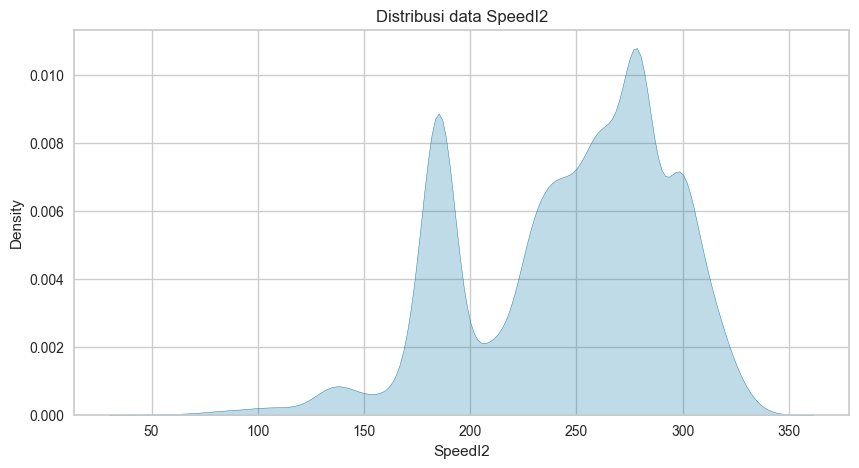

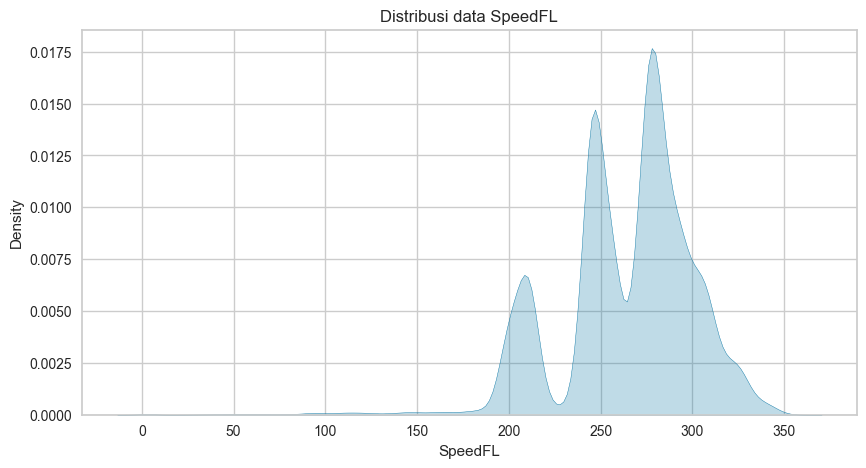

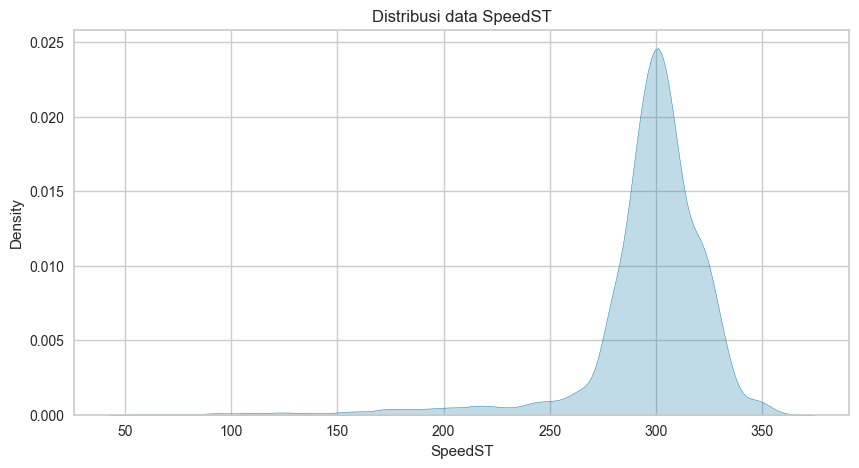

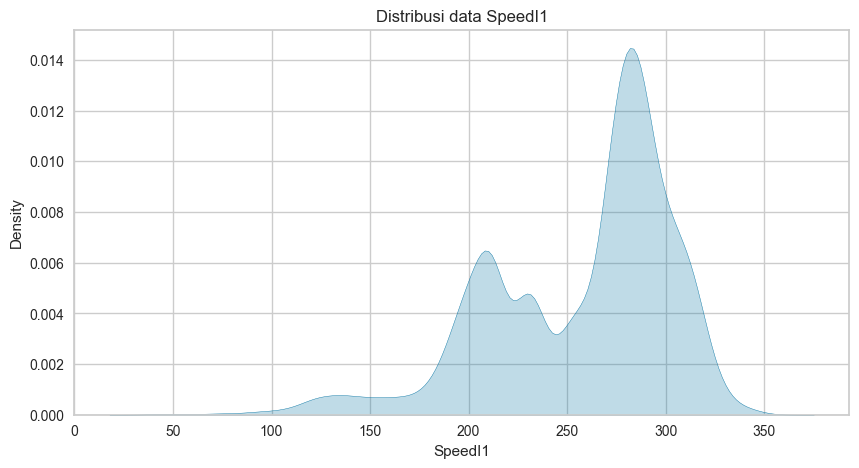

Menampilkan Modus dari data kategorikal
Mode for IsPersonalBest = False
Mode for Sector2SessionTime = 0 days 01:03:29.878000
Mode for Sector2Time = 0 days 00:00:29.905000
Mode for Sector3SessionTime = 0 days 01:06:09.122000
Mode for Sector3Time = 0 days 00:00:25.692000
Mode for LapTime = 0 days 00:01:16.993000
Mode for Sector1Time = 0 days 00:00:28.315000
Mode for Sector1SessionTime = 0 days 01:04:58.279000


In [8]:
show_data_type_and_distribution(f1_data)

In [9]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [10]:
f1_data['SpeedI2'] = fill_null_median(f1_data['SpeedI2'])
f1_data['SpeedFL'] = fill_null_median(f1_data['SpeedFL'])
f1_data['SpeedST'] = fill_null_mean(f1_data['SpeedST'])
f1_data['SpeedI1'] = fill_null_median(f1_data['SpeedI1'])
f1_data['IsPersonalBest'] = fill_null_mode(f1_data['IsPersonalBest'])
f1_data['Sector2SessionTime'] = fill_null_mode(f1_data['Sector2SessionTime'])
f1_data['Sector2Time'] = fill_null_mode(f1_data['Sector2Time'])
f1_data['Sector3SessionTime'] = fill_null_mode(f1_data['Sector3SessionTime'])
f1_data['Sector3Time'] = fill_null_mode(f1_data['Sector3Time'])
f1_data['LapTime'] = fill_null_mode(f1_data['LapTime'])
f1_data['Sector1Time'] = fill_null_mode(f1_data['Sector1Time'])
f1_data['Sector1SessionTime'] = fill_null_mode(f1_data['Sector1SessionTime'])

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_34596\129334964.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_df = df.fillna(mode)


In [11]:
cek_null(f1_data)

Tidak ditemukan missing value pada dataset


### Handling Duplicate Value

In [12]:
print("Jumlah duplikasi data : " + str(f1_data.duplicated().sum()))

Jumlah duplikasi data : 1


In [13]:
f1_data = f1_data.drop_duplicates()

### Handling Outliers

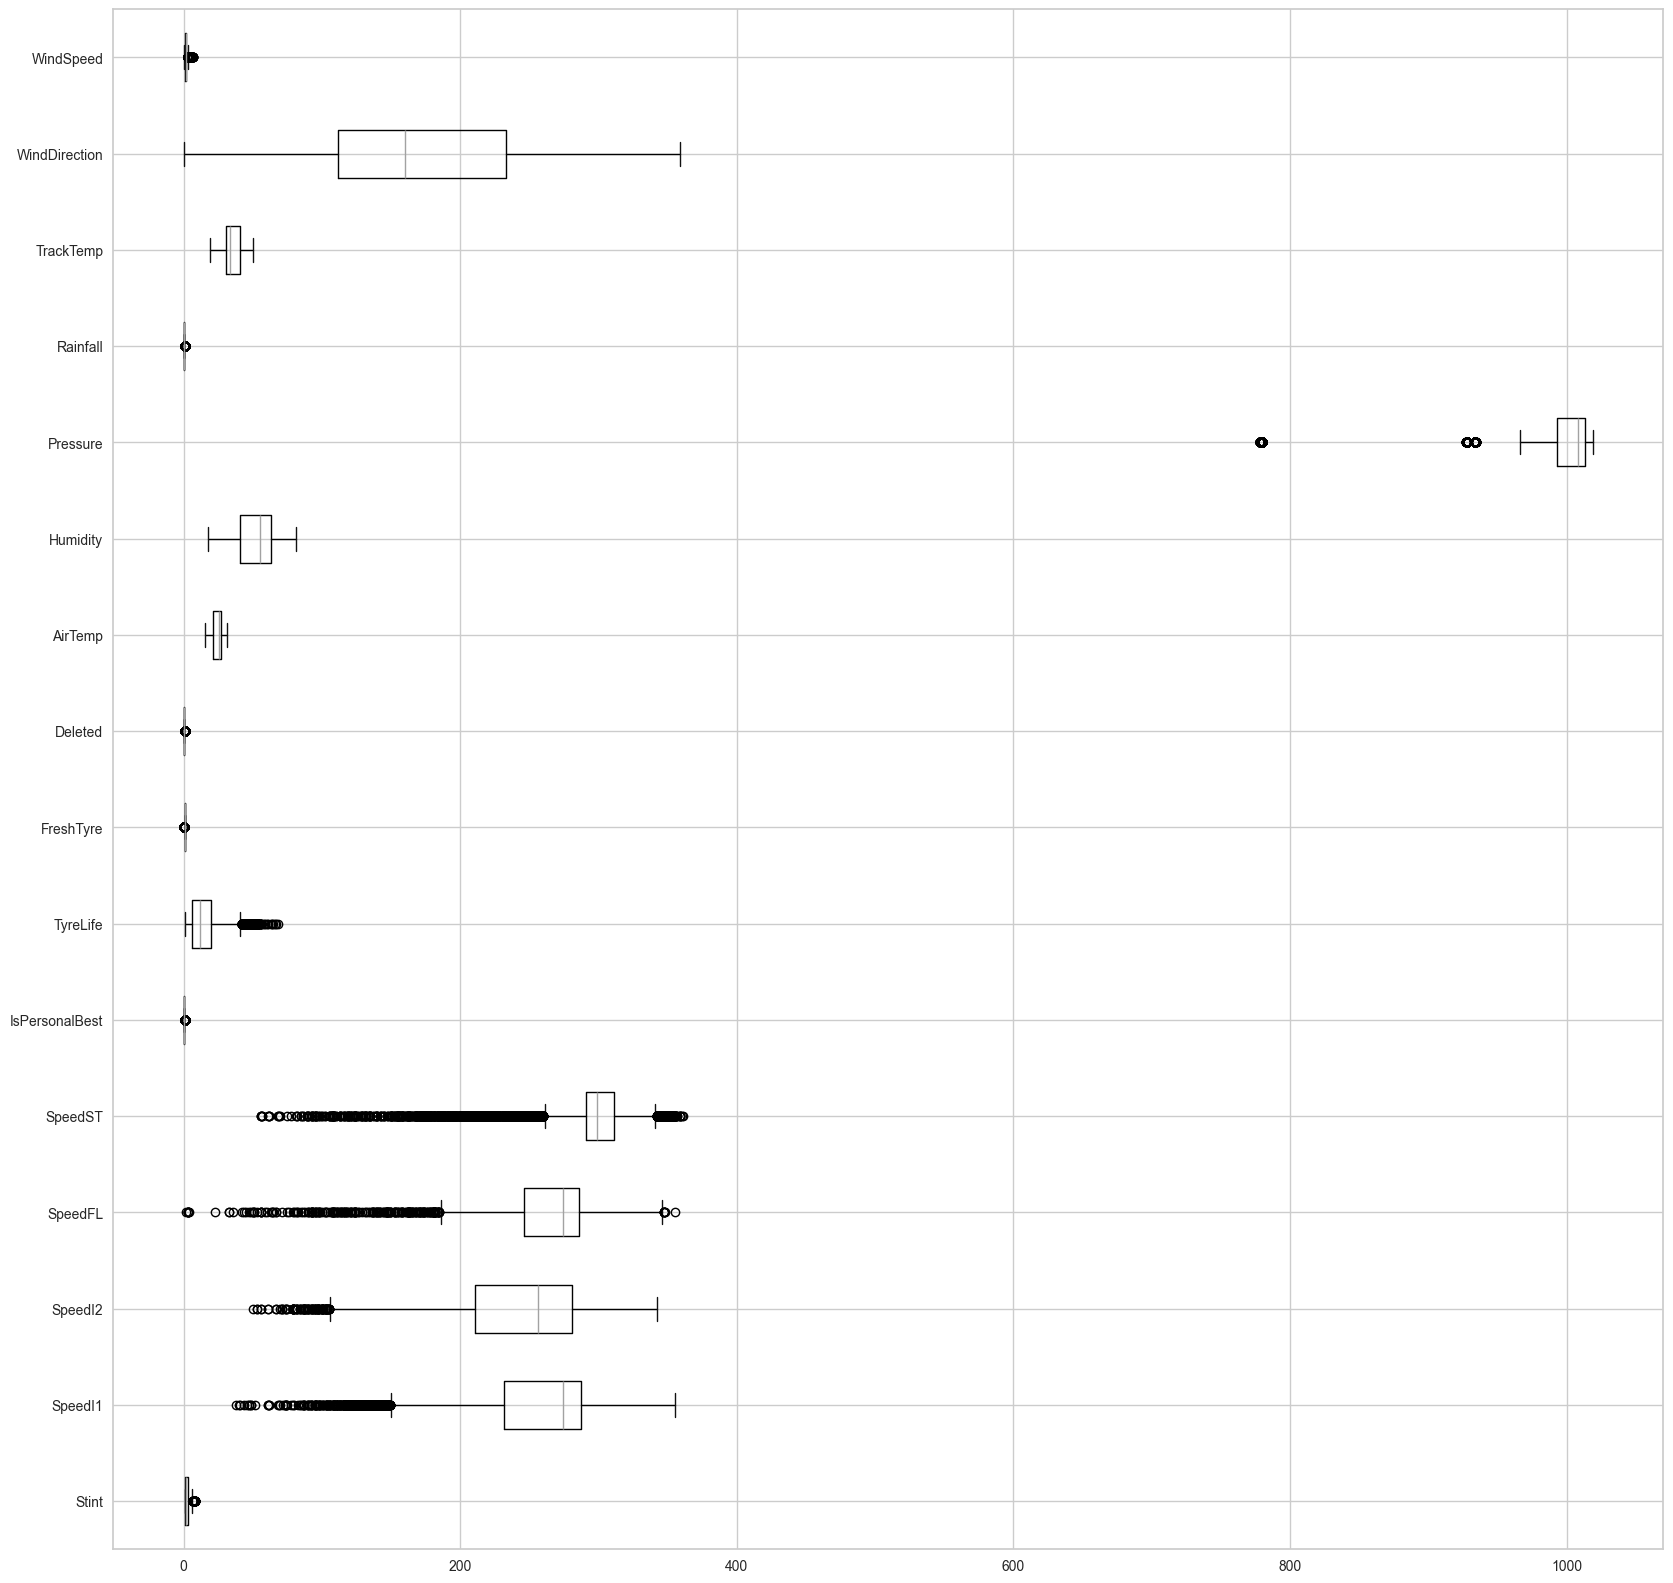

In [14]:
f1_data.boxplot(vert=False,figsize=(20,20))
plt.show()

In [15]:
laptime_numerical = f1_data.select_dtypes(include=['float64', 'int64']) 
Q1 = laptime_numerical.quantile(0.25)
Q3 = laptime_numerical.quantile(0.75)
IQR = Q3 - Q1

In [16]:
print(cek_outlier(f1_data))

Persentase Outlier pada tiap atribut:
Stint             0.298078
SpeedI1           2.746580
SpeedI2           0.548251
SpeedFL           1.320062
SpeedST           7.260340
TyreLife          1.948156
AirTemp           0.000000
Humidity          0.000000
Pressure         15.824772
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         8.026827
dtype: float64
None


> Atribut `Pressure` digunakan untuk memprediksi `TyreLife`, sehingga tidak kami drop .

### Encoding Categorical Attributes

In [17]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
print('#'*70)
print()
for col in f1_data.select_dtypes(include=object).columns:
    print(col, f": {len(f1_data[col].unique())}", f1_data[col].unique())
    print("\n")

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

Time : 18744 ['0 days 02:26:25.496000' '0 days 01:13:51.732000'
 '0 days 02:22:35.139000' ... '0 days 02:00:31.678000'
 '0 days 01:07:59.947000' '0 days 02:04:03.127000']


LapTime : 14761 ['0 days 00:01:40.943000' '0 days 00:01:48.067000'
 '0 days 00:01:22.881000' ... '0 days 00:01:25.235000'
 '0 days 00:01:52.495000' '0 days 00:02:25.892000']


Sector1Time : 11540 ['0 days 00:00:46.163000' '0 days 00:00:39.129000'
 '0 days 00:00:28.890000' ... '0 days 00:01:06.782000'
 '0 days 00:00:30.620000' '0 days 00:00:52.231000']


Sector2Time : 12067 ['0 days 00:00:28.979000' '0 days 00:00:43.601000'
 '0 days 00:00:18.554000' ... '0 days 00:01:09.507000'
 '0 days 00:00:49.567000' '0 days 00:00:53.937000']


Sector3Time : 10711 ['0 days 00:00:25.801000' '0 days 00:00:25.337000'
 '0 days 00:00:35.437000' ... '0 days 00:00:21.484000'
 '0 days 00:00:28.037000

In [18]:
f1_data['Compound'] = f1_data['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})
f1_data['Pos_cat'] = f1_data['Pos_cat'].map({'Participant':0, 'Podium':2, 'Point':1})

In [19]:
def zero_days_remover (duration):
    return duration.replace('0 days ', '')

In [20]:
time_att = []
for col in f1_data.select_dtypes(include=object).columns:
    time_att.append(col)

In [21]:
time_att

['Time',
 'LapTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'LapStartTime']

In [22]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(zero_days_remover)

Untuk memudahkan encoding waktu, kami menghilangkan 0 days karena seluruh data memiliki 0 days dan hal tersebut tidak membantu kami dalam melakukan encoding waktu

In [23]:
def time_converter (time_str):
    if '.' in time_str:
        time_str, milliseconds = time_str.split('.')
        milliseconds = int(milliseconds)
    else:
        milliseconds = 0

    x_time = datetime.datetime.strptime(time_str, '%H:%M:%S')

    total_seconds = datetime.timedelta(
        hours=x_time.hour,
        minutes=x_time.minute,
        seconds=x_time.second,
        microseconds=milliseconds / 1000  # Convert milliseconds to microseconds
    ).total_seconds()
    
    return total_seconds

In [24]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(time_converter)

In [161]:
f1_data

Time     LapTime  Stint  Sector1Time  Sector2Time  Sector3Time  \
0      8785.000496  100.000943    6.0    46.000163    28.000979    25.000801   
1      4431.000732  108.000067    1.0    39.000129    43.000601    25.000337   
2      8555.000139   82.000881    2.0    28.000890    18.000554    35.000437   
3      3816.000822   91.000585    1.0    28.000315    28.000929    30.000478   
4      6340.000072   94.000742    2.0    34.000895    29.000874    29.000973   
...            ...         ...    ...          ...          ...          ...   
18783  5220.000913   85.000235    2.0    30.000620    30.000668    23.000947   
18784  4892.000309  100.000363    1.0    29.000488    42.000838    28.000037   
18785  7231.000678  112.000495    3.0    32.000659    49.000567    30.000269   
18786  4079.000947   85.000938    1.0    30.000564    31.000370    24.000004   
18787  7443.000127  145.000892    3.0    52.000231    53.000937    39.000724   

       Sector1SessionTime  Sector2SessionTime  Sector3SessionTime  SpeedI1  \
0             8736.000926         8765.000905         8791.000706    283.0   
1             4362.000794         4406.000395         4431.000732    199.0   
2             8501.000150         8519.000704         8555.000141    275.0   
3             3898.000279         3786.000412         3816.000927    266.0   
4             6280.000174         6310.000048         6340.000021    274.0   
...                   ...                 ...                 ...      ...   
18783         5166.000294         5196.000962         5220.000909    276.0   
18784         4821.000469         4864.000307         4892.000344    297.0   
18785         7151.000871         7201.000438         7231.000707    309.0   
18786         4024.000556         4055.000926         4079.000930    256.0   
18787         7349.000417         7403.000354         7443.000078    153.0   

       ...  LapStartTime  Deleted  AirTemp  Humidity  Pressure  Rainfall  \
0      ...   8684.000553    False     17.1      68.0    1008.0     False   
1      ...   4323.000665    False     25.0      49.0    1008.5     False   
2      ...   8472.000258    False     17.6      57.0    1018.2     False   
3      ...   3724.000960    False     17.6      67.0    1007.7     False   
4      ...   6245.000330    False     26.1      55.0    1011.0     False   
...    ...           ...      ...      ...       ...       ...       ...   
18783  ...   5135.000678    False     29.3      32.0     988.4     False   
18784  ...   4791.000946    False     30.0      72.0    1009.0     False   
18785  ...   7119.000183    False     17.6      66.0     966.7     False   
18786  ...   3994.000009    False     28.8      33.0     988.5     False   
18787  ...   7297.000235    False     20.9      63.0    1001.2     False   

       TrackTemp  WindDirection  WindSpeed  Pos_cat  
0           24.8            157        3.0        0  
1           43.3            275        1.0        2  
2           29.9              0        0.6        0  
3           29.5            135        1.8        2  
4           31.0            271        1.3        1  
...          ...            ...        ...      ...  
18783       49.9            252        1.2        0  
18784       36.8            145        1.1        0  
18785       30.3            146        1.1        0  
18786       50.1            134        1.5        0  
18787       29.7            246        0.8        1  

[18787 rows x 27 columns]

In [25]:
boolean_columns = ['IsPersonalBest', 'FreshTyre', 'Deleted', 'Rainfall']
f1_data = pd.get_dummies(f1_data, columns = boolean_columns, drop_first=True) 
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18787 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 18787 non-null  float64
 1   LapTime              18787 non-null  float64
 2   Stint                18787 non-null  float64
 3   Sector1Time          18787 non-null  float64
 4   Sector2Time          18787 non-null  float64
 5   Sector3Time          18787 non-null  float64
 6   Sector1SessionTime   18787 non-null  float64
 7   Sector2SessionTime   18787 non-null  float64
 8   Sector3SessionTime   18787 non-null  float64
 9   SpeedI1              18787 non-null  float64
 10  SpeedI2              18787 non-null  float64
 11  SpeedFL              18787 non-null  float64
 12  SpeedST              18787 non-null  float64
 13  Compound             18787 non-null  int64  
 14  TyreLife             18787 non-null  float64
 15  LapStartTime         18787 non-null  floa

## **Eksplorasi** 

### **Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa?**


>Performa dari suatu mobil F1 dapat ditentukan melalui waktu yang ditempuh mobil tersebut selama satu lap, yaitu atribut `LapTime`. Atribut ini juga kami pilih sebagai representasi performa yang dianalisis pengaruhnya oleh `Compound` karena dalam balapan F1, tipe compound yang berbeda tidak mungkin dipakai dalam satu lap yang sama. Oleh karena itu pada eksplorasi ini kami hanya mengambil atribut `Compound` dan `LapTime`

In [163]:
compount_influence = f1_data.copy()

In [164]:
compount_influence = compount_influence[['Compound', 'LapTime']]
compount_influence

Compound     LapTime
0             1  100.000943
1             4  108.000067
2             2   82.000881
3             3   91.000585
4             2   94.000742
...         ...         ...
18783         2   85.000235
18784         4  100.000363
18785         3  112.000495
18786         2   85.000938
18787         4  145.000892

[18787 rows x 2 columns]

In [165]:
compount_influence['Compound'] = compount_influence['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})
compount_influence

Compound     LapTime
0      INTERMEDIATE  100.000943
1            MEDIUM  108.000067
2              HARD   82.000881
3              SOFT   91.000585
4              HARD   94.000742
...             ...         ...
18783          HARD   85.000235
18784        MEDIUM  100.000363
18785          SOFT  112.000495
18786          HARD   85.000938
18787        MEDIUM  145.000892

[18787 rows x 2 columns]

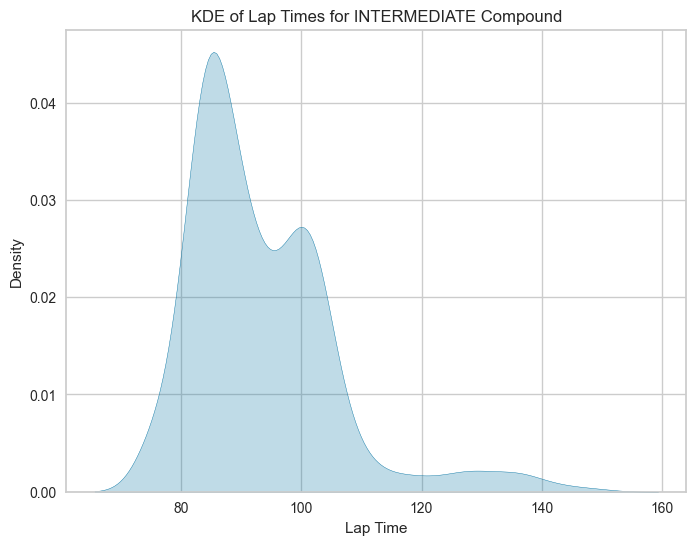

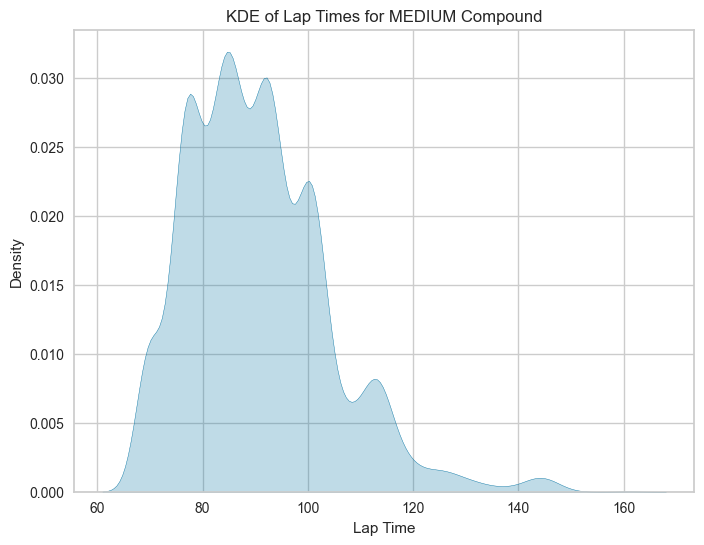

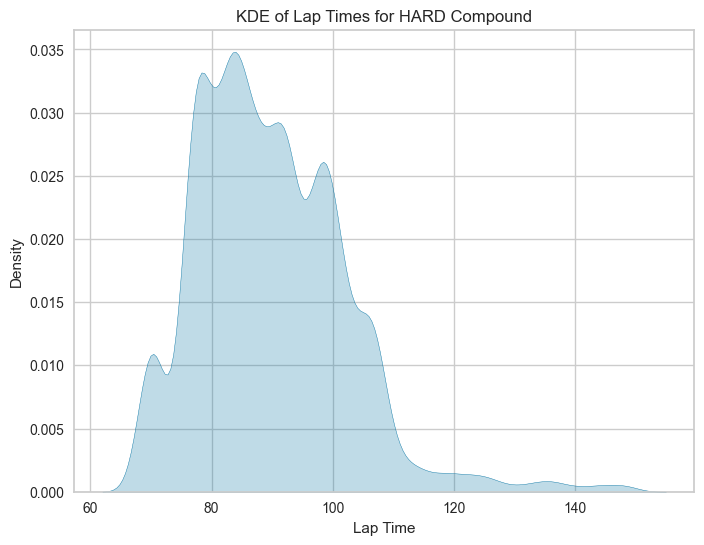

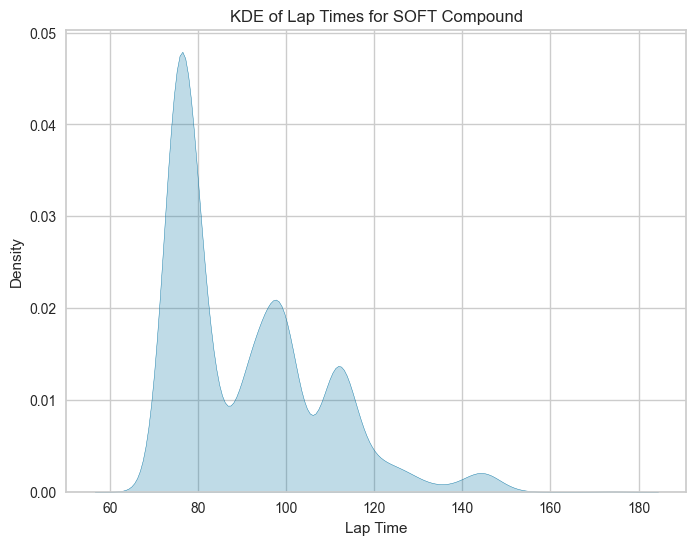

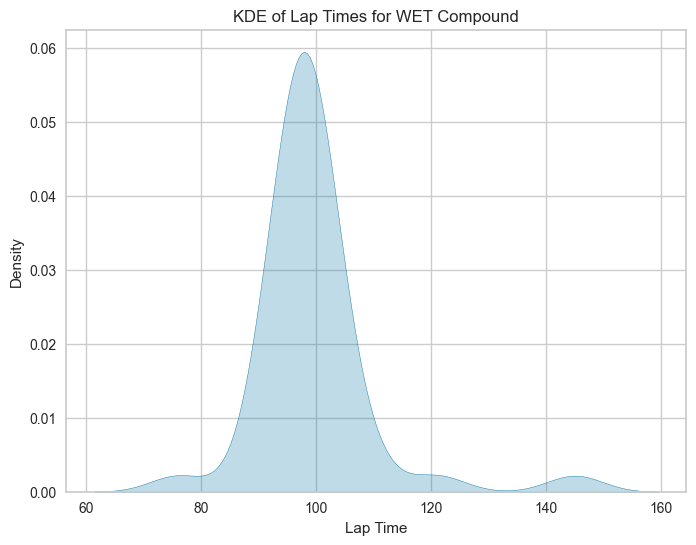

In [166]:
compounds = compount_influence['Compound'].unique()
for compound in compounds:
    plt.figure(figsize=(8, 6))
    subset = compount_influence[compount_influence['Compound'] == compound]['LapTime']
    sns.kdeplot(subset, fill=True)
    plt.title(f'KDE of Lap Times for {compound} Compound')
    plt.xlabel('Lap Time')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

>Berdasarkan KDE plot untuk masing-masing tipe `Compound` terhadap `LapTime`, dapat diketahui bahwa semua tipe `Coumpound` memiliki distribusi positive-skewed. Dengan begitu, central tendency yang dapat digunakan dalam melakukan analisis perbandingan `Compound` terhadap performa mobil F1 berdasarkan `LapTime` adalah **median**.

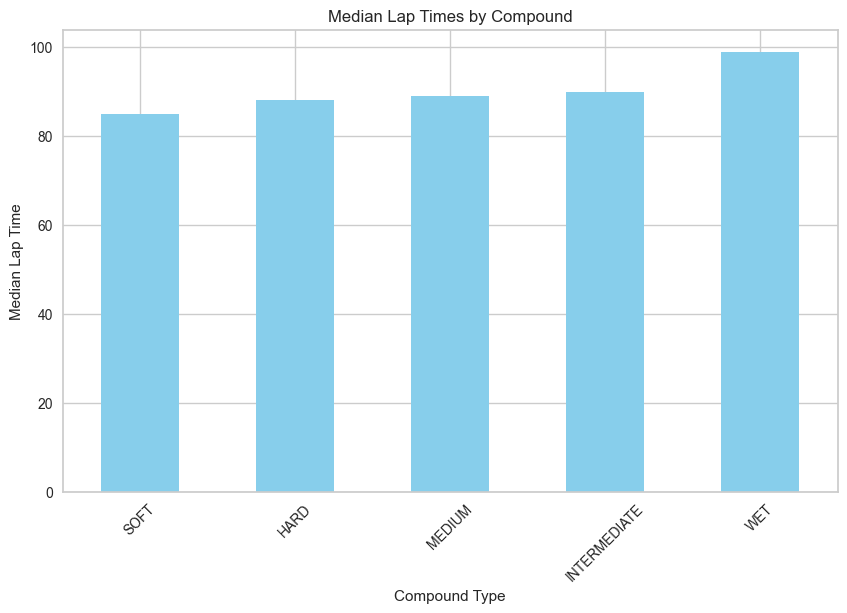

In [167]:
median_laptimes = compount_influence.groupby('Compound')['LapTime'].median()
median_laptimes = median_laptimes.sort_values()
median_laptimes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Median Lap Times by Compound')
plt.xlabel('Compound Type')
plt.ylabel('Median Lap Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> Grafik diatas adalah grafik yang menampilkan median `LapTime` dari setiap `Compound` dan diurutkan dari `LapTime` paling cepat hingga `LapTime` paling lambat

>Berdasarkan visualisasi diatas, dapat dianalisis bahwa setiap tipe `Compound` dapat mempengaruhi performa mobil F1 karena menghasilkan `LapTime` yang berbeda-beda. Performa terbaik didapatkan ketika mobil-mobil F1 menggunakan `Compound` bertipe **SOFT**. Lalu, diikuti dengan tipe  `Compound` **HARD, MEDIUM, & INTERMEDIATE** untuk performa terbaik kedua, ketiga, dan keempat. Untuk performa terburuk, didapatkan ketika mobil F1 menggunakan tipe `Compound` **WET**.

### **Bagaimana ciri-ciri driver dengan kategori posisi ‘Pos_cat’ Podium dibandingkan dengan kategori posisi lainnya?**


>Dalam eksplorasi ini, kami memilih kolom `'LapTime'`, `'SpeedI1'`, `'SpeedI2'`, `'SpeedFL'`, dan`'SpeedST'` sebagai kolom yang akan dicari hubungannya dengan `Pos_cat`. Hal tersebut karena `Pos_cat` itu adalah posisi pembalap ketika mencapai akhir lap dan posisi itu berhubungan dengan waktu yang ditempuh oleh pembalap. Waktu tersebut dapat berhubungan dengan hal seperti kecepatan.

In [ ]:
exp_poscat = f1_data[['Pos_cat', 'LapTime', 'Compound', 'SpeedI1', 'SpeedI2', 'IsPersonalBest_True',
                       'SpeedFL', 'SpeedST']]
exp_poscat['Pos_cat'] = f1_data['Pos_cat'].map({0:'Participant', 2:'Podium', 1:'Point'})
exp_poscat['Compound'] = exp_poscat['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})
exp_poscat.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_16880\1833355161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_poscat['Pos_cat'] = f1_data['Pos_cat'].map({0:'Participant', 2:'Podium', 1:'Point'})
C:\Users\asus\AppData\Local\Temp\ipykernel_16880\1833355161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_poscat['Compound'] = exp_poscat['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})


Pos_cat     LapTime      Compound  SpeedI1  SpeedI2  \
0  Participant  100.000943  INTERMEDIATE    283.0    262.0   
1       Podium  108.000067        MEDIUM    199.0    205.0   
2  Participant   82.000881          HARD    275.0    291.0   
3       Podium   91.000585          SOFT    266.0    258.0   
4        Point   94.000742          HARD    274.0    300.0   

   IsPersonalBest_True  SpeedFL   SpeedST  
0                False    288.0  296.6188  
1                False    336.0  321.0000  
2                 True    288.0  289.0000  
3                False    274.0  205.0000  
4                False    295.0  308.0000

Pertama-tama kami akan melihat persebaran data pada Pos_cat.

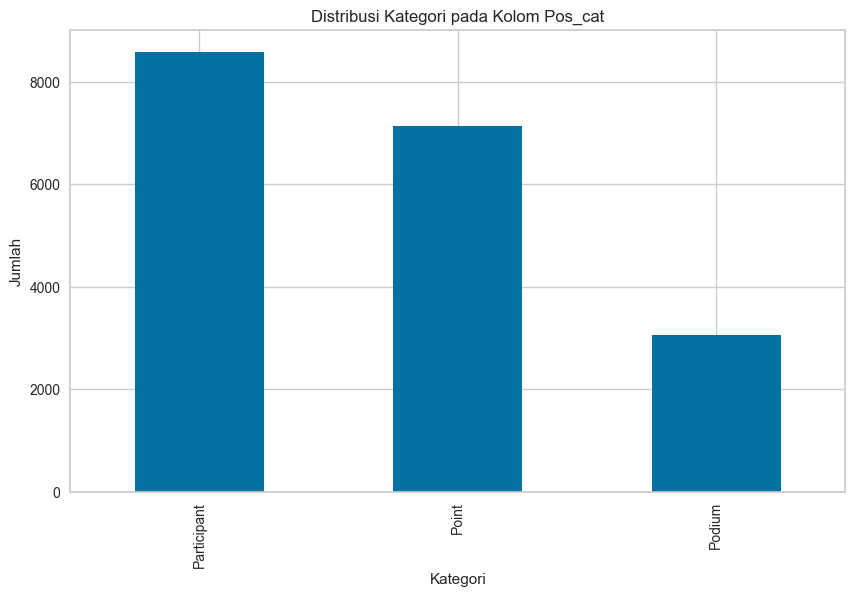

In [ ]:
# Menghitung frekuensi setiap kategori
kategori_counts = exp_poscat['Pos_cat'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
kategori_counts.plot(kind='bar')
plt.title('Distribusi Kategori pada Kolom Pos_cat')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
# Memberikan nama untuk setiap kategori
plt.show()


Dari Bar plot di atas, dapat dilihat bahwa ada ketidakseimbangan (imbalance) untuk kolom ini karena entri data Participant > Point > Podium. 

In [ ]:
poscat_podium = exp_poscat[exp_poscat['Pos_cat'] == 'Podium']
poscat_point = exp_poscat[exp_poscat['Pos_cat'] == 'Point']
poscat_participant = exp_poscat[exp_poscat['Pos_cat'] == 'Participant']

In [ ]:
poscat_podium.describe()

LapTime      SpeedI1      SpeedI2      SpeedFL      SpeedST
count  3065.000000  3065.000000  3065.000000  3065.000000  3065.000000
mean     88.995939   260.375856   247.142577   263.938662   293.250066
std      12.976848    41.938695    45.325349    35.381124    29.895734
min      67.000012    73.000000    53.000000     2.000000    70.000000
25%      79.000104   235.000000   218.000000   246.000000   290.000000
50%      87.000718   274.000000   257.000000   274.000000   296.618800
75%      97.000843   286.000000   280.000000   284.000000   306.000000
max     149.000966   341.000000   341.000000   347.000000   348.000000

In [ ]:
poscat_point.describe()

LapTime      SpeedI1      SpeedI2      SpeedFL      SpeedST
count  7136.000000  7136.000000  7136.000000  7136.000000  7136.000000
mean     89.767174   260.749720   247.535314   264.715387   297.225533
std      13.280315    43.504258    47.007821    36.266179    28.218452
min      68.000111    40.000000    50.000000     3.000000    68.000000
25%      79.000507   233.000000   214.000000   246.000000   292.000000
50%      88.000372   274.000000   257.000000   274.000000   300.000000
75%      98.000523   288.000000   281.000000   288.000000   310.000000
max     149.000326   346.000000   342.000000   344.000000   359.000000

In [ ]:
poscat_participant.describe()

LapTime      SpeedI1      SpeedI2      SpeedFL      SpeedST
count  8586.000000  8586.000000  8586.000000  8586.000000  8586.000000
mean     91.215273   259.430585   245.182390   264.682856   297.317090
std      14.036833    43.877692    48.115521    35.617396    31.403631
min      68.000529    38.000000    56.000000     3.000000    56.000000
25%      80.000462   230.000000   204.000000   246.000000   292.000000
50%      90.000000   274.000000   255.000000   274.000000   300.000000
75%     100.000191   287.000000   281.000000   286.000000   313.000000
max     174.000634   355.000000   339.000000   355.000000   361.000000

>Pertama-tama, kami memutuskan untuk melihat KDE masing-masing tipe Pos_cat untuk melihat distribusi dari masing-masingnya dan mendapatkan central tendency.

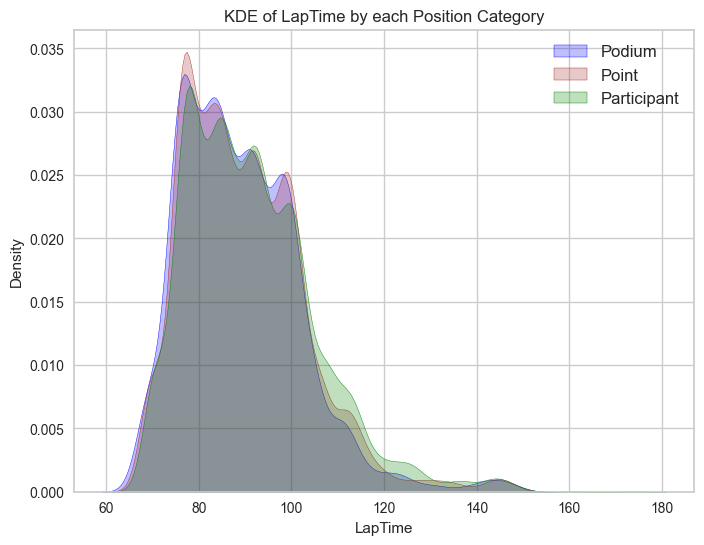

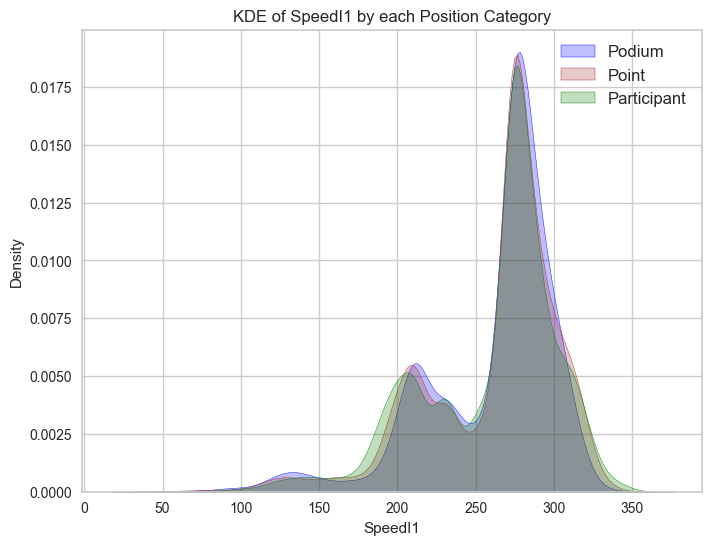

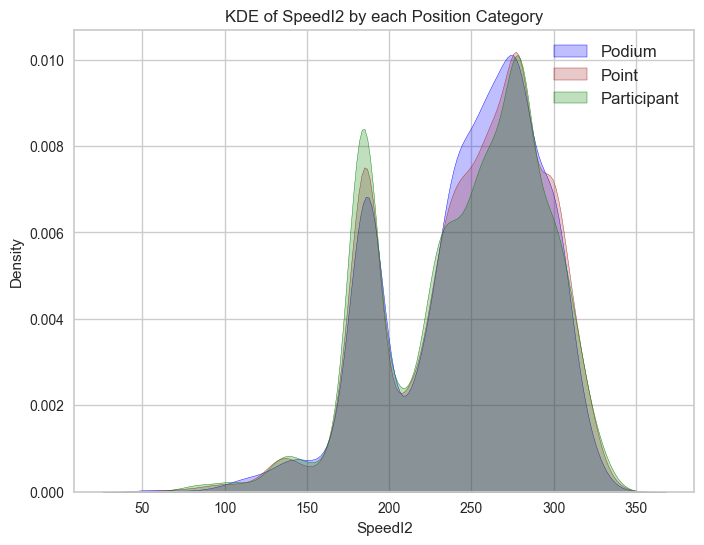

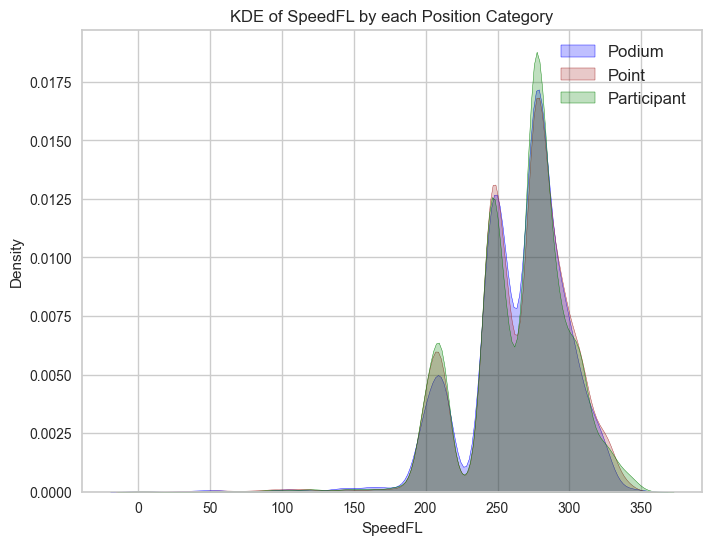

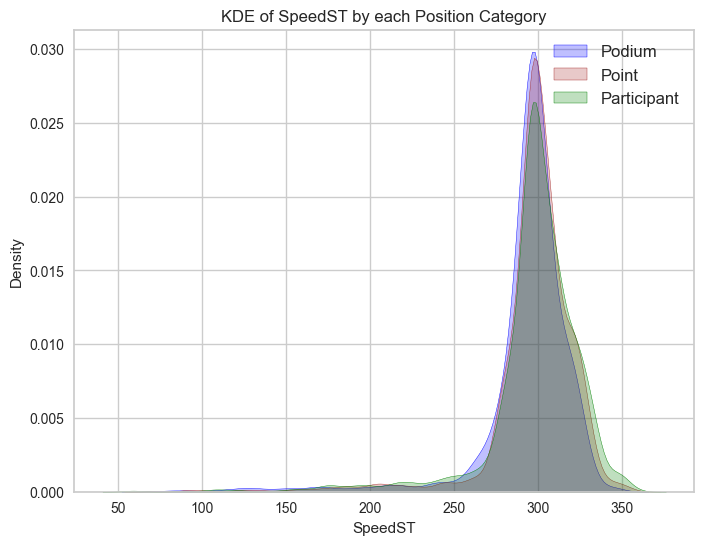

In [ ]:
poscats = exp_poscat['Pos_cat'].unique()
columns = ['LapTime', 'SpeedI1',	'SpeedI2',	'SpeedFL',	'SpeedST']
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(exp_poscat[exp_poscat['Pos_cat'] == 'Podium'][column], fill=True, color='blue')
    sns.kdeplot(exp_poscat[exp_poscat['Pos_cat'] == 'Point'][column], fill=True, color='brown')
    sns.kdeplot(exp_poscat[exp_poscat['Pos_cat'] == 'Participant'][column], fill=True, color='green')
    plt.legend(['Podium', 'Point', 'Participant'], fontsize=12)
    plt.title(f'KDE of {column} by each Position Category')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

>Dapat dilihat pada KDE plot di atas, seluruhnya memiliki distribusi skewed, baik negative skewed maupun positive skewed. Oleh karena itu, kami menggunakan median sebagai central tendencynya untuk menganalisis perbandingannya.

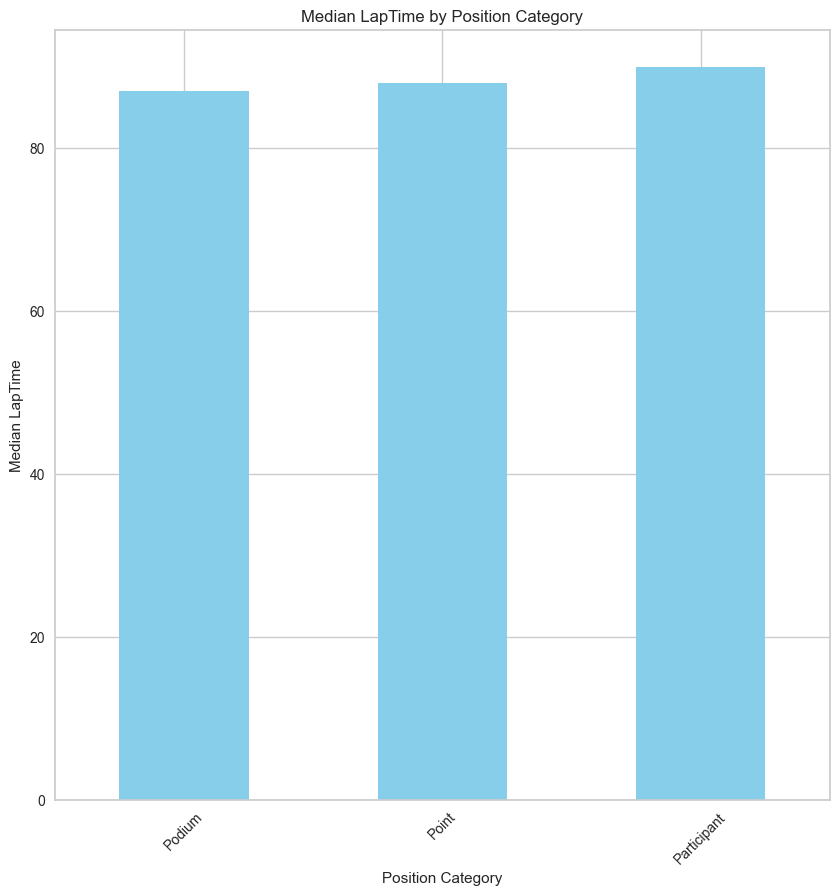

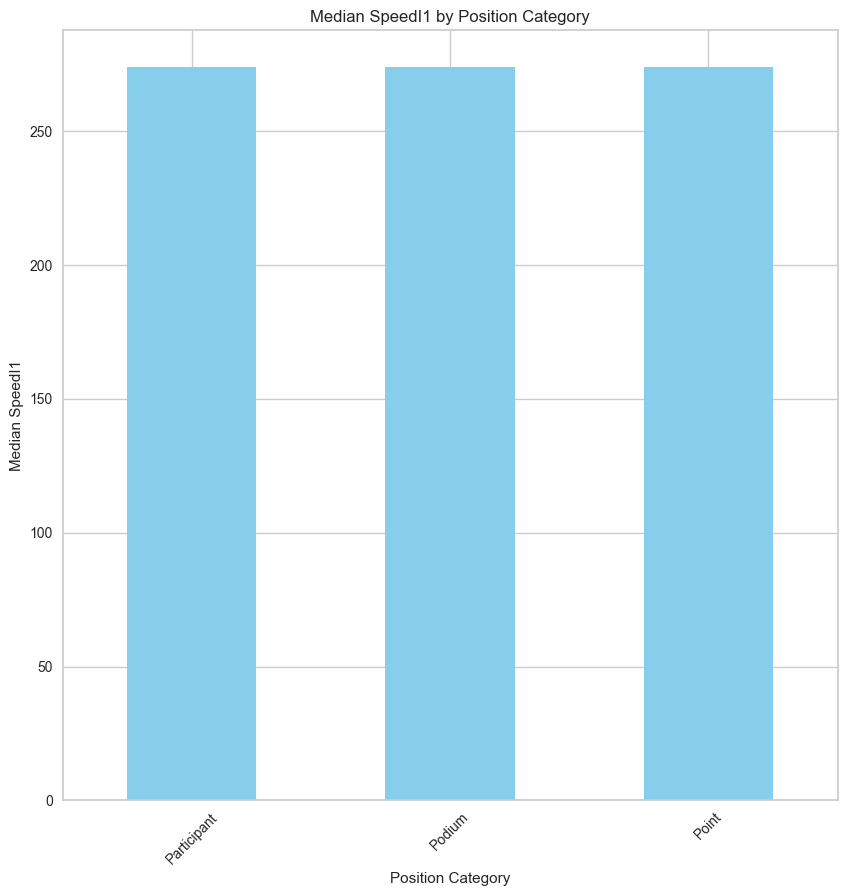

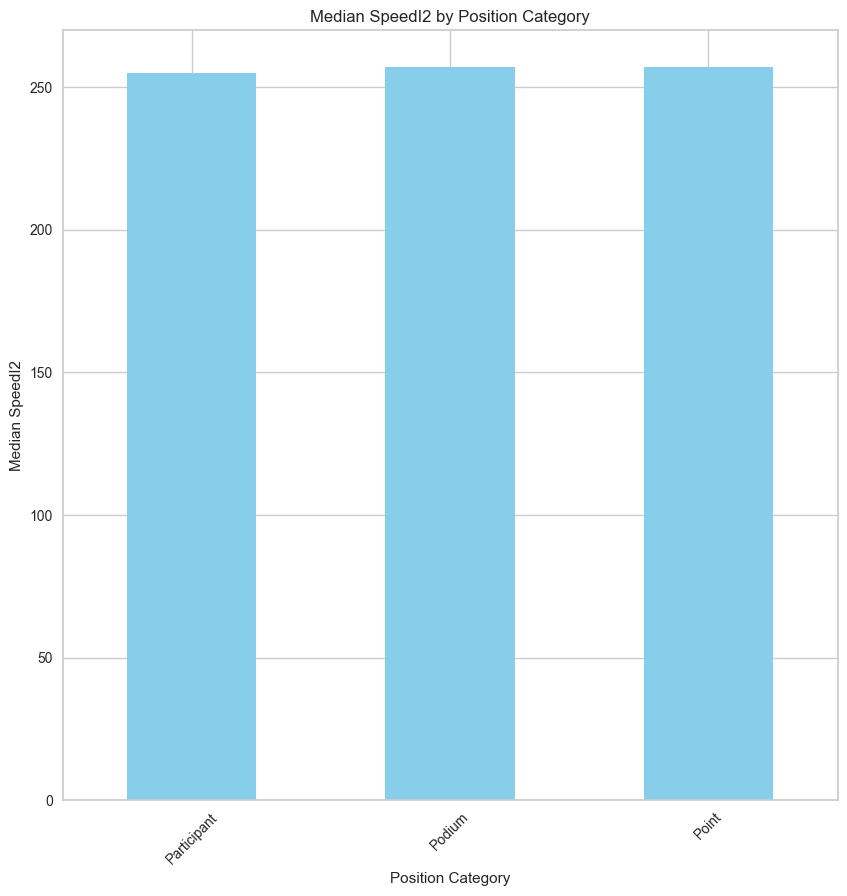

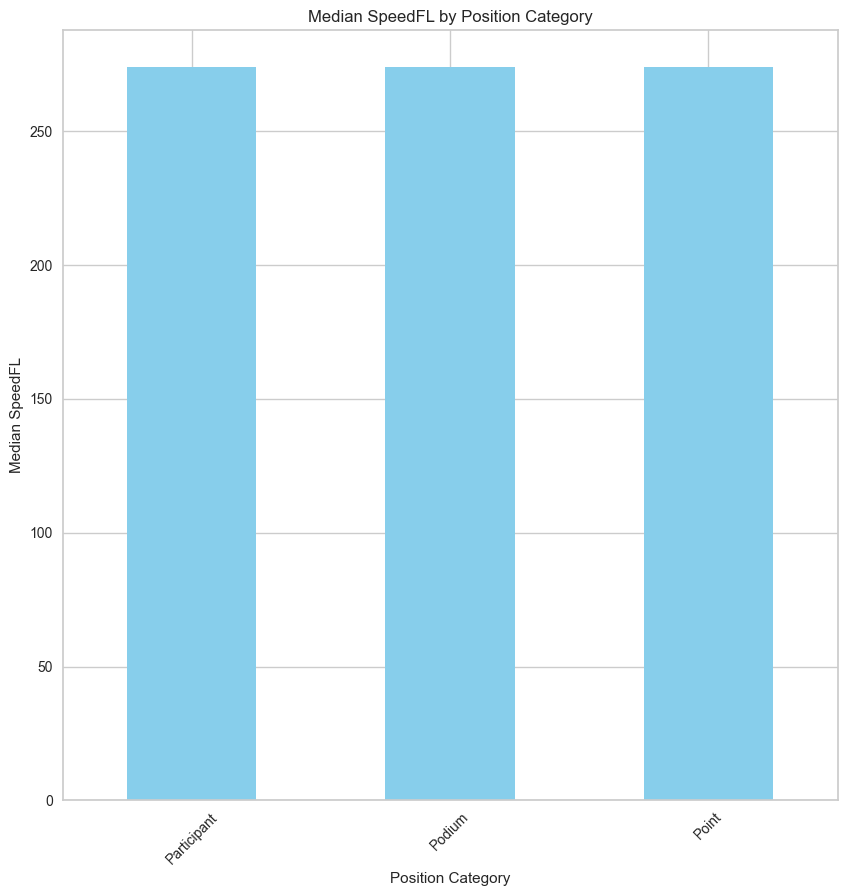

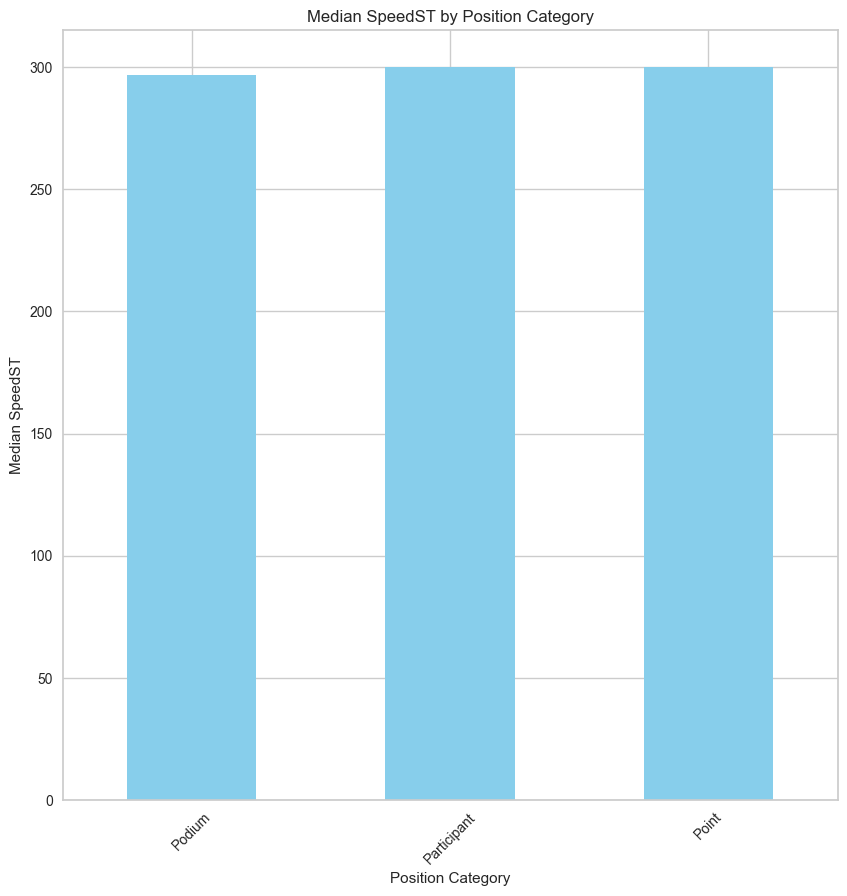

In [ ]:
for column in columns:
    median_poscat = exp_poscat.groupby('Pos_cat')[column].median()
    median_poscat = median_poscat.sort_values() 
    median_poscat.plot(kind='bar', figsize=(10,10 ), color='skyblue')
    plt.title(f'Median {column} by Position Category')
    plt.xlabel('Position Category')
    plt.ylabel(f'Median {column}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

>Kami memilih Bar Plot karena pada konteks tersebut yang dibandingkan adalah kolom kategorikal (Pos_cat) dengan kolom numerik kontinu (kolom yang dilihat mediannya).

>Berdasarkan Bar Plot di atas, dapat dilihat bahwa untuk Pos_cat bertipe Podium memiliki ciri-ciri sebagai berikut:
-	Pos_cat bertipe Podium memiliki nilai tengah LapTime dan SpeedST yang terkecil daripada tipe yang lainnya.
-	Pos_cat bertipe Podium memiliki nilai tengah SpeedI1, SpeedI2, dan SpeedFL diantara tipe yang lainnya.

In [ ]:
# Menghitung value counts untuk setiap kelompok 'Pos_cat'
value_counts_by_pos_cat = exp_poscat.groupby('Pos_cat')['Compound'].value_counts()

print(value_counts_by_pos_cat)


Pos_cat      Compound    
Participant  HARD            4417
             MEDIUM          2674
             SOFT            1232
             INTERMEDIATE     226
             WET               37
Podium       HARD            1262
             MEDIUM          1207
             SOFT             488
             INTERMEDIATE     107
             WET                1
Point        HARD            3293
             MEDIUM          2549
             SOFT            1055
             INTERMEDIATE     239
Name: count, dtype: int64


In [ ]:
# Menghitung value counts untuk setiap kelompok 'Pos_cat'
value_counts_by_pos_cat = f1_data.groupby('Pos_cat')['IsPersonalBest_True'].value_counts()

print(value_counts_by_pos_cat)


Pos_cat  IsPersonalBest_True
0        False                  7011
         True                   1575
1        False                  5768
         True                   1368
2        False                  2516
         True                    549
Name: count, dtype: int64


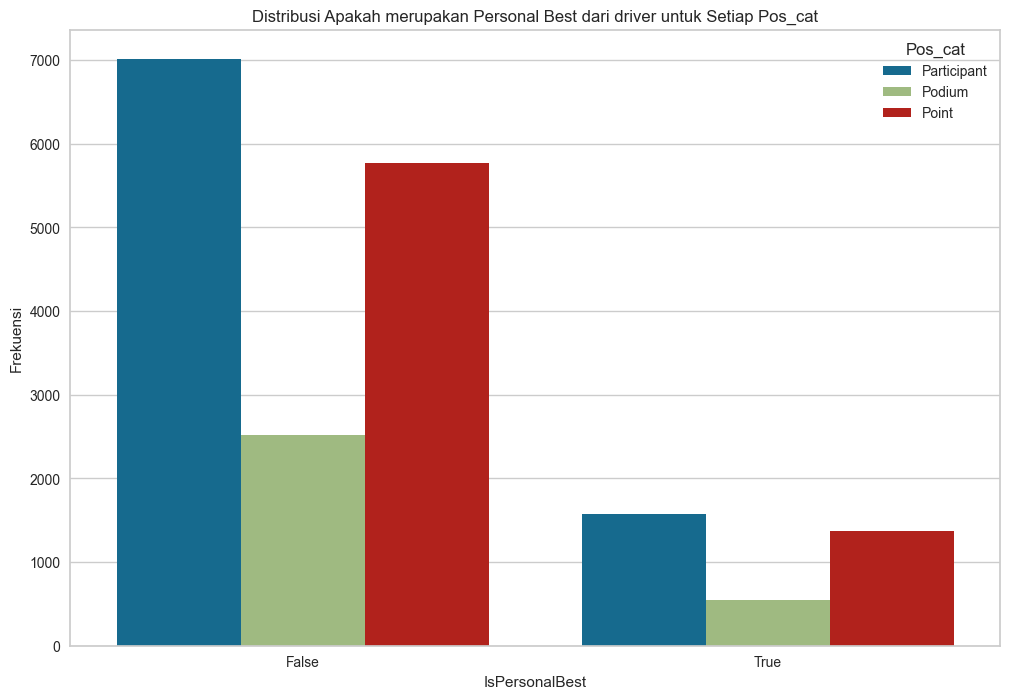

In [ ]:
# Plot distribusi Personal Best untuk setiap Pos_cat
plt.figure(figsize=(12, 8))
sns.countplot(data=exp_poscat, x='IsPersonalBest_True', hue='Pos_cat')
plt.title('Distribusi Apakah merupakan Personal Best dari driver untuk Setiap Pos_cat')
plt.xlabel('IsPersonalBest')
plt.ylabel('Frekuensi')
plt.legend(title='Pos_cat')
plt.show()


Berdasarkan distribusi data di atas, dapat disimpulkan bahwa untuk setiap lap yang tercatat cenderung tidak memecahkan rekor Personal Best,, baik Poscat Podium maupun poscat lainnya.

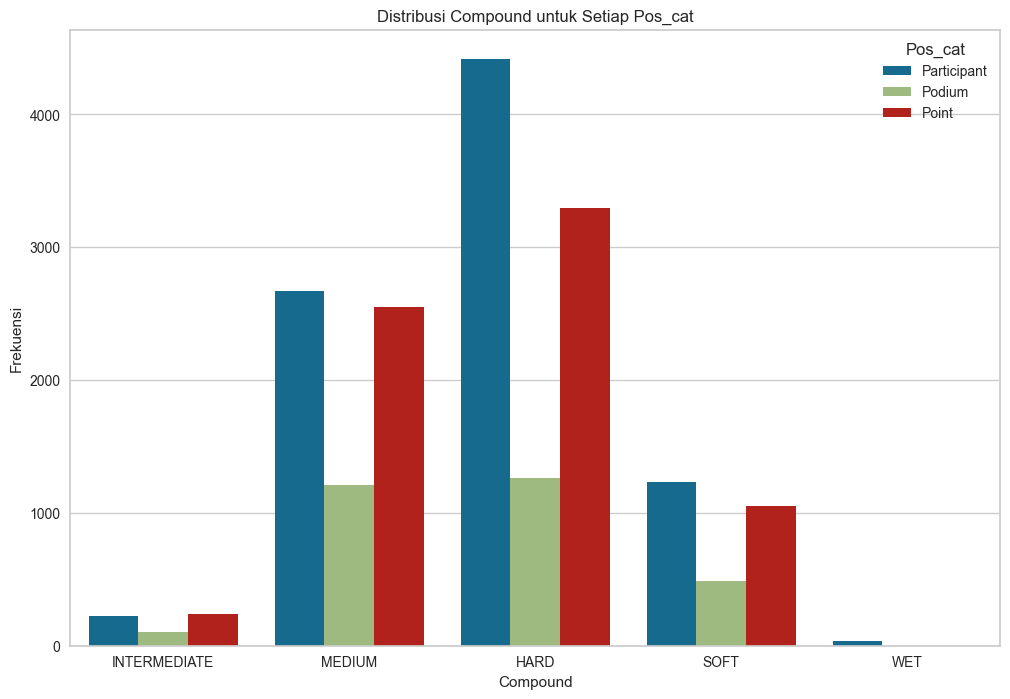

In [ ]:
# Plot distribusi Compound untuk setiap Pos_cat
plt.figure(figsize=(12, 8))
sns.countplot(data=exp_poscat, x='Compound', hue='Pos_cat')
plt.title('Distribusi Compound untuk Setiap Pos_cat')
plt.xlabel('Compound')
plt.ylabel('Frekuensi')
plt.legend(title='Pos_cat')
plt.show()


Dapat dilihat pada Distribusi Compound di atas, seluruh driver memilih tipe ban Hard sebagai pilihan utama lalu disusul oleh ban tipe Medium. Akan tetapi, pada poscat Podium hal perbedaan pemilihan Medium dan Hard tidak signifikan sementara pada poscat lain perbedaannya signifikan. Selain itu, tipe ban Wet paling jarang digunakan oleh poscat manapun disusul oleh tipe ban Intermediate.

### **Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak**


In [ ]:
df_rain = f1_data.copy()
mean_attributes = ['LapTime', 'TyreLife', 'AirTemp', 'Humidity', 'TrackTemp','WindSpeed']
mode_attributes = ['Compound']

reverse_compound_mapping = {1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'}
df_rain['Compound'] = df_rain['Compound'].map(reverse_compound_mapping)

LapTime         99.630265
TyreLife         8.958258
AirTemp         19.647005
Humidity        63.439201
TrackTemp       27.058258
WindSpeed        1.683122
Compound     INTERMEDIATE
dtype: object

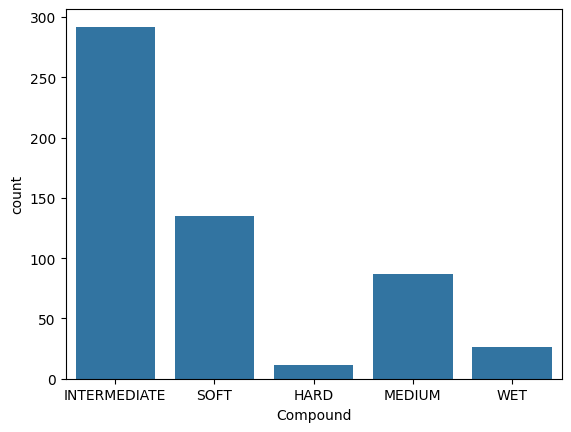

In [ ]:
rainfall_data = df_rain[df_rain['Rainfall_True'] == True]
rainfall_mean = rainfall_data[mean_attributes].mean()
rainfall_mode = rainfall_data[mode_attributes].mode().iloc[0]

rainfall_combined = pd.concat([rainfall_mean, rainfall_mode])

countplot('Compound', rainfall_data)
rainfall_combined

LapTime      90.021341
TyreLife     14.418897
AirTemp      24.709706
Humidity      51.63413
TrackTemp     35.79637
WindSpeed     1.703043
Compound          HARD
dtype: object

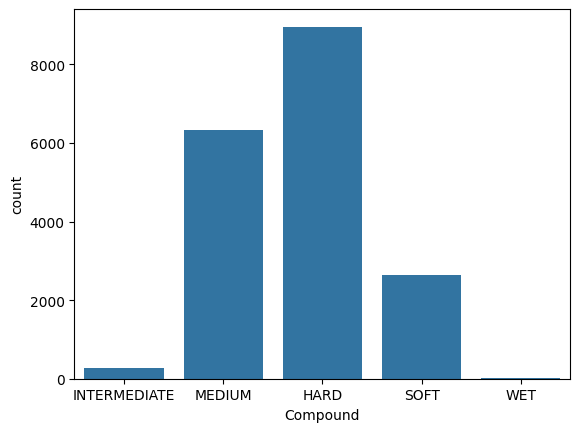

In [ ]:
no_rainfall_data = df_rain[df_rain['Rainfall_True'] == False]
no_rainfall_mean = no_rainfall_data[mean_attributes].mean()
no_rainfall_mode = no_rainfall_data[mode_attributes].mode().iloc[0]

no_rainfall_combined = pd.concat([no_rainfall_mean, no_rainfall_mode])

countplot('Compound', no_rainfall_data)
no_rainfall_combined

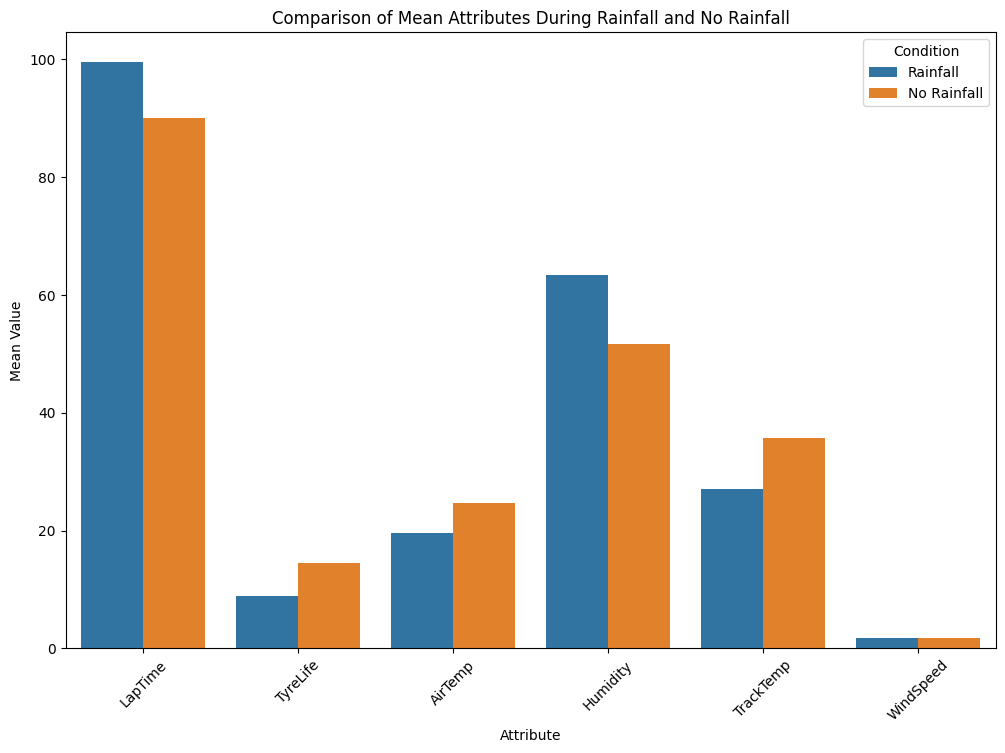

In [ ]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Attribute': mean_attributes,
    'Rainfall': rainfall_mean.values,
    'No Rainfall': no_rainfall_mean.values
})

# Melt the DataFrame for easier plotting with seaborn
comparison_df_melted = pd.melt(comparison_df, id_vars='Attribute', var_name='Condition', value_name='Mean Value')

# Plotting the grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Attribute', y='Mean Value', hue='Condition', data=comparison_df_melted)
plt.title('Comparison of Mean Attributes During Rainfall and No Rainfall')
plt.xlabel('Attribute')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.show()

Di sini, kami akan melakukan perbandingan kondisi balapan ketika sirkuit 'Rainfall' dan tidak dengan asumsi bahwa data ini adalah kumpulan dari balapan-balapan satu musim di lokasi dan waktu yg berbeda. Dari data yang telah diolah, kami menemukan bahwa terdapat beberapa aspek yang berbeda dari sirkuit 'Rainfall' dan tidak.  LapTime dari dua keadaan sirkuit ini berbeda cukup signifikan, di mana dalam keadaan 'Rainfall' diperlukan lebih banyak waktu untuk melakukan 'LapTime' jika dibandingkan dengan track tidak 'Rainfall'. Dari segi 'AirTemp', sirkuit 'Rainfall' memiliki temperatur udara yang lebih rendah. Selain itu, sirkuit 'Rainfall' memiliki temperatur track yang lebih rendah, serta memiliki 'humidity' lebih tinggi jika dibanding track yang tidak 'Rainfall'. Ban Intermediate menjadi ban yang sering dipakai pada sirkuit 'Rainfall'. Di sirkuit yang tidak 'Rainfall', temperatur track lebih tinggi dibanding track 'Rainfall'. Adapun 'Compound' ban yang sering dipakai untuk sirkuit tidak 'Rainfall' adalah ban berjenis Hard.

### **Adakah sektor time yang paling berpengaruh terhadap performa pembalap meraih Personal Best?**

In [ ]:
sector_time_data = f1_data[['Sector1Time', 'Sector2Time', 'Sector3Time', 'LapTime', 'IsPersonalBest_True']]
sector_time_data

Sector1Time  Sector2Time  Sector3Time     LapTime  IsPersonalBest_True
0        46.000163    28.000979    25.000801  100.000943                False
1        39.000129    43.000601    25.000337  108.000067                False
2        28.000890    18.000554    35.000437   82.000881                 True
3        28.000315    28.000929    30.000478   91.000585                False
4        34.000895    29.000874    29.000973   94.000742                False
...            ...          ...          ...         ...                  ...
18783    30.000620    30.000668    23.000947   85.000235                False
18784    29.000488    42.000838    28.000037  100.000363                 True
18785    32.000659    49.000567    30.000269  112.000495                False
18786    30.000564    31.000370    24.000004   85.000938                 True
18787    52.000231    53.000937    39.000724  145.000892                False

[18787 rows x 5 columns]

In [ ]:
sector_time_data['Sector1Time'] = sector_time_data['Sector1Time']/sector_time_data['LapTime'] * 100
sector_time_data['Sector2Time'] = sector_time_data['Sector2Time']/sector_time_data['LapTime'] * 100
sector_time_data['Sector3Time'] = sector_time_data['Sector3Time']/sector_time_data['LapTime'] * 100
sector_time_data

C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_27108\1955910279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_time_data['Sector1Time'] = sector_time_data['Sector1Time']/sector_time_data['LapTime'] * 100
C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_27108\1955910279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_time_data['Sector2Time'] = sector_time_data['Sector2Time']/sector_time_data['LapTime'] * 100
C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_27108\195591027

Sector1Time  Sector2Time  Sector3Time     LapTime  IsPersonalBest_True
0        45.999729    28.000715    25.000565  100.000943                False
1        36.111208    39.815347    23.148446  108.000067                False
2        34.147060    21.951659    42.683001   82.000881                 True
3        30.769379    30.770054    32.967346   91.000585                False
4        36.170879    30.851750    30.851855   94.000742                False
...            ...          ...          ...         ...                  ...
18783    35.294749    35.294806    27.059863   85.000235                False
18784    29.000383    42.000686    27.999935  100.000363                 True
18785    28.571891    43.750313    26.785836  112.000495                False
18786    35.294392    36.470621    28.234987   85.000938                 True
18787    35.862008    36.552145    26.896886  145.000892                False

[18787 rows x 5 columns]

In [ ]:
min_values = [
    sector_time_data['Sector1Time'].mean(),
    sector_time_data['Sector2Time'].mean(),
    sector_time_data['Sector3Time'].mean()
]
print(min_values)

[31.226608179329673, 39.2289890983397, 29.54482089251298]


C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_27108\761113515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_time_data[['Sector1Time', 'Sector2Time', 'Sector3Time']].melt(), x='variable', y='value', palette='viridis')


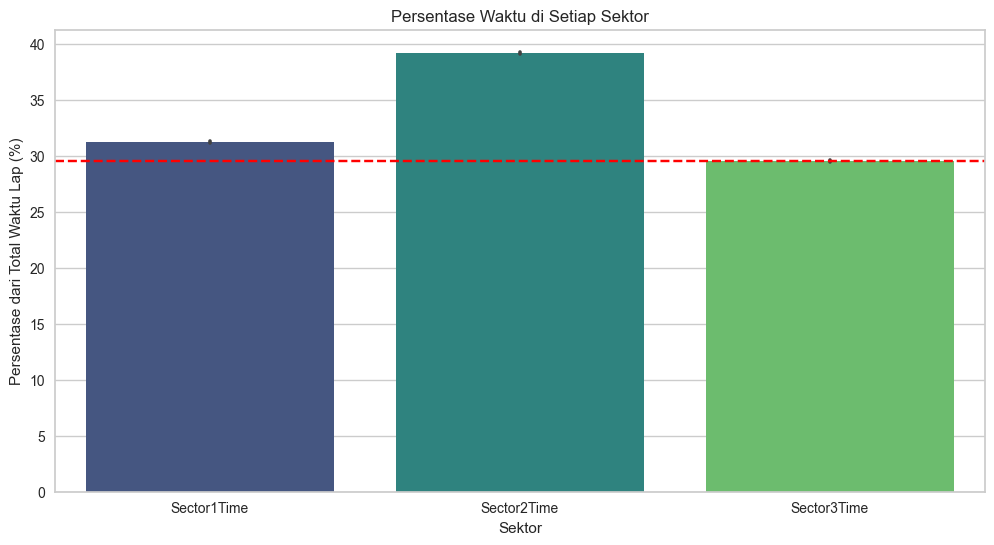

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_time_data[['Sector1Time', 'Sector2Time', 'Sector3Time']].melt(), x='variable', y='value', palette='viridis')
plt.axhline(y = min(min_values), color = 'red', linestyle = 'dashed')
plt.title('Persentase Waktu di Setiap Sektor')
plt.xlabel('Sektor')
plt.ylabel('Persentase dari Total Waktu Lap (%)')
plt.show()

> Berdasarkan visualisasi diatas, dapat dianalisis bahwa Sector2Time memiliki pengaruh terebesar terhadap performa pembalap F1 meraih PersonaBest, karena memiliki persentase terbesar dibandingkan sector lainnya untuk memperoleh PersonalBest. Pengaruh terbaik didapatkan ketika pembalap F1 berhasil melalui sector 2 tercepat. Lalu, diikuti dengan sector 1 untuk performa terbaik kedua. Untuk pengaruh terkecil, didapatkan ketika pembalap F1 melalui sector Sector 3 tercepat.

### **Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya?**


In [ ]:
tyre_life_performance = f1_data.copy()
tyre_life_performance = tyre_life_performance[['LapTime', 'TyreLife']]

tyre_life_performance

LapTime  TyreLife
0      100.000943       8.0
1      108.000067       6.0
2       82.000881      34.0
3       91.000585       1.0
4       94.000742       9.0
...           ...       ...
18783   85.000235       7.0
18784  100.000363      11.0
18785  112.000495       6.0
18786   85.000938       4.0
18787  145.000892       5.0

[18787 rows x 2 columns]

In [ ]:
def categorize_tyrelife(tyre_age):
    if tyre_age <= 25:
        return 'New'
    elif tyre_age <= 50:
        return 'Moderate Use'
    else:
        return 'Worn Out'

> Kami menggunakan asumsi bahwa tipe **compound** tidak dipertimbangkan dalam rentang umur ban.

In [ ]:
tyre_life_performance['TyreLife'] = tyre_life_performance['TyreLife'].apply(categorize_tyrelife)
tyre_life_performance

LapTime      TyreLife
0      100.000943           New
1      108.000067           New
2       82.000881  Moderate Use
3       91.000585           New
4       94.000742           New
...           ...           ...
18783   85.000235           New
18784  100.000363           New
18785  112.000495           New
18786   85.000938           New
18787  145.000892           New

[18787 rows x 2 columns]

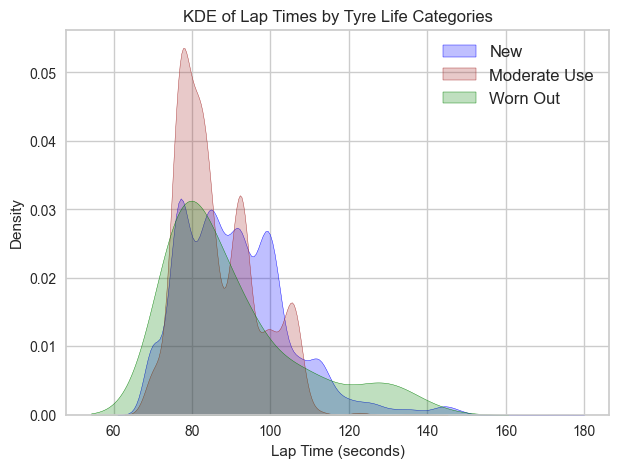

In [ ]:
plt.figure(figsize=(7,5))

# KDE plot for each category
sns.kdeplot(tyre_life_performance[tyre_life_performance['TyreLife'] == 'New']['LapTime'], fill=True, color='blue')
sns.kdeplot(tyre_life_performance[tyre_life_performance['TyreLife'] == 'Moderate Use']['LapTime'], fill=True, color='brown')
sns.kdeplot(tyre_life_performance[tyre_life_performance['TyreLife'] == 'Worn Out']['LapTime'], fill=True, color='green')


# Customize the legend and labels
plt.legend(['New', 'Moderate Use', 'Worn Out'], fontsize=12)
plt.title('KDE of Lap Times by Tyre Life Categories')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')

# Display the plot
plt.show()

Dari hasil KDE Plot diatas, dapat dilihat bahwa distribusi semua nya bersifat *positive skewed*. Maka **median** cocok digunakan untuk menggambarkan central tendency dari data yang

In [ ]:
median_tyre_life_lap_times = tyre_life_performance.groupby('TyreLife')['LapTime'].median().reset_index()
median_tyre_life_lap_times.rename(columns={'LapTime': 'MedianLapTime'}, inplace=True)
median_tyre_life_lap_times

TyreLife  MedianLapTime
0  Moderate Use      83.000926
1           New      89.000858
2      Worn Out      84.000296

> Dari hasil median diatas, kami menemukan bahwa median dari laptime untuk umur ban yang **Moderate Use** dan **Worn Out** tidak jauh berbeda. dapat dilihat bahwa **Moderate Use, ketika ban berumur 26 hingga 50 laps** memiliki median laptime yang terkecil, kemudian diikuti oleh **Worn Out, ketika ban berusia diatas 50 laps** dan terakhir merupakan **New, ketika ban berumur 0 hingga 25 laps**.  Ban yang memiliki usia **Moderate Use** menjadi yang terbaik karena ban yang digunakan sudah mencapai grip dan suhu ban yang optimum.

### **Apakah keadaan `TrackTemp` mempengaruhi `Compound` yang digunakan dan `TyreLife` dari ban para pembalab?**

In [51]:
track_temp_effect = f1_data[['TrackTemp', 'Compound', 'TyreLife']]
track_temp_effect

TrackTemp  Compound  TyreLife
0           24.8         1       8.0
1           43.3         4       6.0
2           29.9         2      34.0
3           29.5         3       1.0
4           31.0         2       9.0
...          ...       ...       ...
18783       49.9         2       7.0
18784       36.8         4      11.0
18785       30.3         3       6.0
18786       50.1         2       4.0
18787       29.7         4       5.0

[18787 rows x 3 columns]

In [52]:
track_temp_effect['Compound_ori'] = track_temp_effect['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})
track_temp_effect

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_34596\1119477032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_temp_effect['Compound_ori'] = track_temp_effect['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})


TrackTemp  Compound  TyreLife  Compound_ori
0           24.8         1       8.0  INTERMEDIATE
1           43.3         4       6.0        MEDIUM
2           29.9         2      34.0          HARD
3           29.5         3       1.0          SOFT
4           31.0         2       9.0          HARD
...          ...       ...       ...           ...
18783       49.9         2       7.0          HARD
18784       36.8         4      11.0        MEDIUM
18785       30.3         3       6.0          SOFT
18786       50.1         2       4.0          HARD
18787       29.7         4       5.0        MEDIUM

[18787 rows x 4 columns]

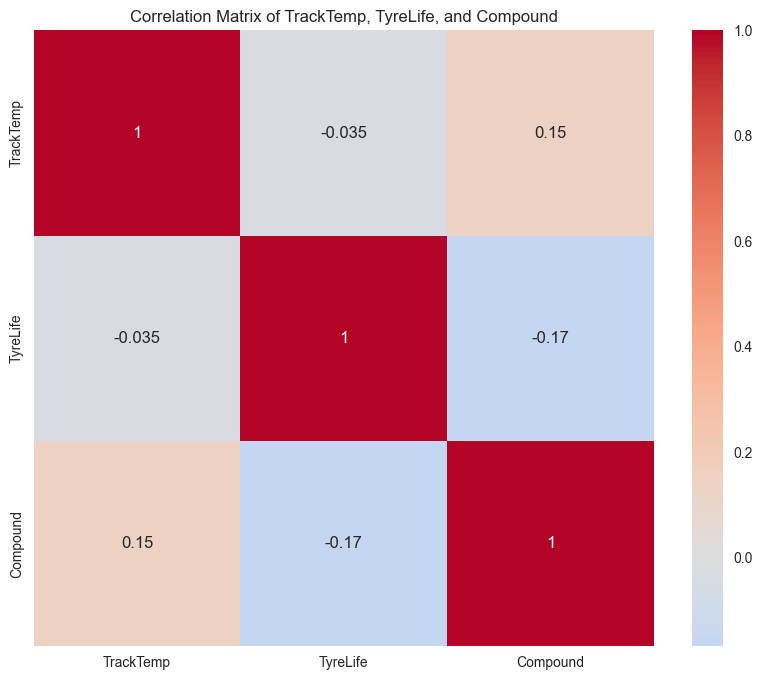

In [54]:
correlation_matrix = track_temp_effect[['TrackTemp', 'TyreLife', 'Compound']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of TrackTemp, TyreLife, and Compound')
plt.show()

>Berdasarkan matrix korelasi pada heatmap diatas, dapat diketahui bahwa korelasi `TrackTemp` terhadap `TyreLife` sangat kecil, yaitu sebesar -0,035 sehingga dapat disimpulkan bahwa `TrackTemp` tidak memiliki pengaruh kepada `TyreLife` ban yang digunakan pembalap F1. Untuk `Compound` dengan `TrackTemp` menunjukkan angka yang tidak besar juga, namun lebih tinggi dibandingkan hubungan `TrackTemp` terhadap `TyreLife` sehingga akan dicari tahu kecenderungan `Compound` untuk keadaan `TrackTemp` tertentu.

Atribut `TrackTemp` memiliki value yang sangat bervariasi karena memilili tipe data bilangan kontinu. Oleh karena itu, untuk mempermudah eksplorasi, value-value tersebut kami ubah menjadi sebuah rentang menggunakan `pd.cut` sehingga akan berubah menjadi bilangan diskret yang merepresentasikan setiap rentang dari value pada atribut `TrackTemp` ini.

In [53]:
track_temp_effect['TrackTemp_bin'] = pd.cut(track_temp_effect['TrackTemp'], bins=10, labels=False)
track_temp_effect

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_34596\3876645046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_temp_effect['TrackTemp_bin'] = pd.cut(track_temp_effect['TrackTemp'], bins=10, labels=False)


TrackTemp  Compound  TyreLife  Compound_ori  TrackTemp_bin
0           24.8         1       8.0  INTERMEDIATE              1
1           43.3         4       6.0        MEDIUM              7
2           29.9         2      34.0          HARD              3
3           29.5         3       1.0          SOFT              3
4           31.0         2       9.0          HARD              3
...          ...       ...       ...           ...            ...
18783       49.9         2       7.0          HARD              9
18784       36.8         4      11.0        MEDIUM              5
18785       30.3         3       6.0          SOFT              3
18786       50.1         2       4.0          HARD              9
18787       29.7         4       5.0        MEDIUM              3

[18787 rows x 5 columns]

Sekarang value dari `TrackTemp` sudah merupakan bilangan diskret yang memiliki value 0 hingga 9. Value 0 menyatakan temperatur yang cenderung lebih rendah dibandingkan rentang lainnya dan value 9 merupakan temperatur tertinggi.

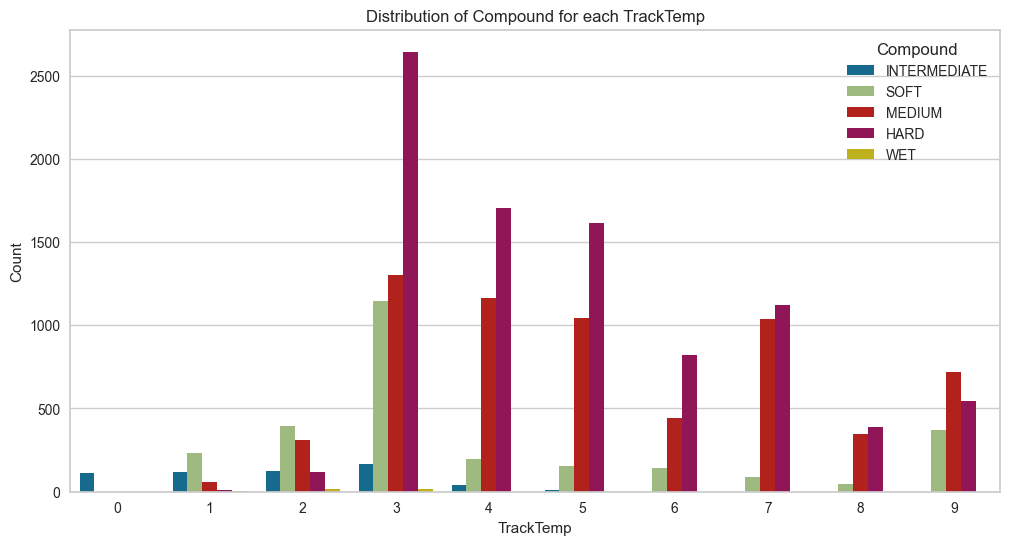

In [55]:
# Plot distribution dari Compound untuk setiap rentang TrackTemp
plt.figure(figsize=(12, 6))
sns.countplot(data=track_temp_effect, x='TrackTemp_bin', hue='Compound_ori')
plt.title('Distribution of Compound for each TrackTemp')
plt.xlabel('TrackTemp')
plt.ylabel('Count')
plt.legend(title='Compound')
plt.show()

>Berdasarkan bar graph yang merepresentasikan jumlah penggunaan `Compound` untuk setiap rentang `TrackTemp` diatas, dapat dianalisis bahwa:

1. **TrackTemp Bin 0-1**:
   - Penggunaan `Compound` INTERMEDIATE dan WET cukup dominan pada suhu lintasan yang sangat rendah. Hal ini kemungkinan disebabkan oleh kondisi cuaca yang basah atau licin pada suhu lintasan yang lebih rendah.

2. **TrackTemp Bin 2-3**:
   - Pada suhu lintasan yang lebih rendah hingga sedang (TrackTemp 2-3), penggunaan `Compound` HARD dan SOFT meningkat, dengan `Compound` HARD yang paling sering digunakan pada suhu lintasan ini.
   - `Compound` MEDIUM dan SOFT juga cukup sering digunakan, menandakan variasi dalam pemilihan ban untuk rentang suhu ini.

3. **TrackTemp Bin 4-7**:
   - Pada rentang suhu lintasan menengah hingga tinggi (TrackTemp 4-7), `Compound` HARD tetap dominan, menunjukkan bahwa ban dengan compound keras lebih disukai pada suhu lintasan yang lebih tinggi.
   - `Compound` MEDIUM dan SOFT juga digunakan cukup sering, menunjukkan bahwa beberapa tim mungkin memilih ban yang lebih lembut meskipun suhu lintasan lebih tinggi.

4. **TrackTemp Bin 8-9**:
   - Pada suhu lintasan yang sangat tinggi (TrackTemp 8-9), penggunaan `Compound` MEDIUM dan SOFT meningkat, dengan penurunan penggunaan `Compound` HARD. Hal ini menunjukkan bahwa pada suhu yang sangat tinggi, ban yang lebih lembut mungkin lebih disukai untuk mendapatkan performa yang lebih baik.
   - `Compound` WET dan INTERMEDIATE hampir tidak digunakan pada suhu lintasan yang sangat tinggi, yang logis karena kondisi cuaca yang cenderung kering pada suhu tinggi.

>**Kesimpulan**

- **Suhu Rendah**: `Compound` INTERMEDIATE dan WET lebih sering digunakan pada suhu lintasan yang rendah, menunjukkan kondisi cuaca yang basah atau licin.
- **Suhu Menengah**: `Compound` HARD paling sering digunakan pada suhu lintasan menengah, menunjukkan preferensi untuk ban yang lebih keras dalam kondisi suhu yang sedang hingga tinggi.
- **Suhu Tinggi**: `Compound` MEDIUM dan SOFT lebih sering digunakan pada suhu lintasan yang sangat tinggi, menandakan bahwa tim mungkin mencari performa optimal dengan ban yang lebih lembut pada suhu yang sangat panas.

## **Regresi**

In [168]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

### Decision Tree

In [246]:
# Split Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [247]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [248]:
# Decision Tree 
dtr_f1 = DecisionTreeRegressor()
dtr_f1.fit(X_regress_train, y_regress_train)

DecisionTreeRegressor()

In [249]:
predicted_dtr = dtr_f1.predict(X_regress_test)
regression_metrics(predicted_dtr, y_regress_test)

MAE: 2.2325705162320384
MSE: 19.792620188043287
RMSE: 4.448889770273398
R_squared: 0.8108565516796508


### Decision Tree Regressor dengan Hyperparameter Tuning

In [ ]:
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [ ]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

>Selanjutnya, kami menginisialisasi range hyper parameter untuk dilakukan hyper parameter tuning.

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            "splitter":["best","random"],
            "max_depth" : [None, 1,3,9, 20],
            'min_samples_split': [0.1, 1, 2, 3, 7],
           "min_samples_leaf":[0.1,1,2,3,7],
           "min_weight_fraction_leaf":[-0.5,-0.3,0.0,0.3,0.5],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,50,90] }

>Selanjutnya, kami menggunakan GridSearchCV untuk mencari parameter terbaik untuk Decision Tree yang sudah dibuat.

In [ ]:
# Decision Tree 
dtr_f1 = DecisionTreeRegressor()
dtr_f1.fit(X_regress_train, y_regress_train)

DecisionTreeRegressor()

Kami menggunakan RandomizedSearchCV karena jika menggunakan GridSearchCV total fits yang dilakukan terlalu besar dan memakan waktu terlalu banyak karena parameter yang diuji juga banyak.

In [ ]:
# calculating different regression metrics

from sklearn.model_selection import RandomizedSearchCV
tuning_model = RandomizedSearchCV(dtr_f1,param_distributions=parameters,cv=3,n_iter=1000,n_jobs=-1,verbose=3,random_state=42)


In [ ]:
tuning_model.fit(X_regress_train,y_regress_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1581 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 1, 3, 9, 20],
                                        'max_features': ['log2', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 50,
                                                           90],
                                        'min_samples_leaf': [0.1, 1, 2, 3, 7],
                                        'min_samples_split': [0.1, 1, 2, 3, 7],
                                        'min_weight_fraction_leaf': [-0.5, -0.3,
                                                                     0.0, 0.3,
                                                                     0.5],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=3)

In [ ]:
tuning_model.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'poisson'}

>Dengan menggunakan RandomizedSearchCV, didapatkan hyperparameter terbaik seperti di atas. Selanjutnya akan digunakan sebagai parameter pada Decision Tree di bawah.

In [ ]:
best_hp = DecisionTreeRegressor(**tuning_model.best_params_)
best_hp.fit(X_regress_train, y_regress_train)
predicted = best_hp.predict(X_regress_test)
regression_metrics(predicted, y_regress_test)

MAE: 2.402637127916532
MSE: 16.86468206048851
RMSE: 4.106663129657521
R_squared: 0.8388366931997152


>Karena kami menggunakan RandomizedSearchCV, setiap percobaan akan menghasilkan nilai metrik yang berbeda. Kami berhasil menemukan nilai metrik yang mampu meningkatkan perfoma model dengan best parameter yang dihasilkan oleh RandomizedSearchCV sebagai berikut.

>{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'poisson'} 


### Random Forest

In [ ]:
# Split dan seleksi fitur Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [ ]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [ ]:
#Standarisasi
scaler = MinMaxScaler()

X_regress_train = scaler.fit_transform(X_regress_train)
X_regress_test = scaler.transform(X_regress_test)

In [ ]:
# Random Forest
rf_f1 = RandomForestRegressor()
rf_f1.fit(X_regress_train, y_regress_train)

# Memprediksi data testing
predicted = rf_f1.predict(X_regress_test)
regression_metrics(predicted, y_regress_test)

MAE: 1.7556679084619478
MSE: 9.734375696292355
RMSE: 3.1199961051726257
R_squared: 0.9069757632415539


### Ridge Regression

In [ ]:
# Split dan seleksi fitur Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [ ]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [ ]:
#Standarisasi
scaler = MinMaxScaler()

X_regress_train = scaler.fit_transform(X_regress_train)
X_regress_test = scaler.transform(X_regress_test)

In [ ]:
alpha_f1 = [0.01, 0.1, 1, 10, 100]

In [ ]:
ridge_model_f1 = []
for alpha in alpha_f1:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_regress_train, y_regress_train)
    ridge_model_f1.append(ridge)

In [ ]:
from sklearn import metrics
metrics_list = []
counter = 1
for model in ridge_model_f1:
    y_pred = model.predict(X_regress_test)
    mse = metrics.mean_squared_error(y_regress_test, y_pred)
    mae = metrics.mean_absolute_error(y_regress_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = metrics.r2_score(y_regress_test, y_pred)
    
    metrics_list.append((alpha_f1[counter-1], mse, mae, rmse, r2))
    
    print(f'Model Ridge regression ke {counter}')
    print("MSE:", mse)
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R-squared:", r2)
    print()
    counter += 1

# Find the best model based on RMSE (you can change the criteria if needed)
best_model_idx = max(range(len(metrics_list)), key=lambda i: metrics_list[i][4])  # Using R-squared for selection
best_model = ridge_model_f1[best_model_idx]

print(f'Model terbaik adalah model ke-{best_model_idx + 1} dengan alpha={metrics_list[best_model_idx][0]}')
print(f'Metrik Evaluasi - MSE: {metrics_list[best_model_idx][1]}, MAE: {metrics_list[best_model_idx][2]}, RMSE: {metrics_list[best_model_idx][3]}, R-squared: {metrics_list[best_model_idx][4]}')

Model Ridge regression ke 1
MSE: 47.179895336752274
MAE: 5.195211196230772
RMSE: 6.868762285648869
R-squared: 0.5491365968424263

Model Ridge regression ke 2
MSE: 47.1861164317603
MAE: 5.1955252766189375
RMSE: 6.869215124871276
R-squared: 0.5490771464335888

Model Ridge regression ke 3
MSE: 47.239374166427126
MAE: 5.1978205928460515
RMSE: 6.873090583313094
R-squared: 0.5485682016102702

Model Ridge regression ke 4
MSE: 47.55797441237136
MAE: 5.218315463759714
RMSE: 6.896228999414924
R-squared: 0.5455235744421095

Model Ridge regression ke 5
MSE: 54.237469375917115
MAE: 5.611019269142896
RMSE: 7.364609248012899
R-squared: 0.48169257589616366

Model terbaik adalah model ke-1 dengan alpha=0.01
Metrik Evaluasi - MSE: 47.179895336752274, MAE: 5.195211196230772, RMSE: 6.868762285648869, R-squared: 0.5491365968424263


### Linear Regression

In [254]:
# Split Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [255]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [256]:
#Standarisasi
scaler = MinMaxScaler()

X_regress_train = scaler.fit_transform(X_regress_train)
X_regress_test = scaler.transform(X_regress_test)

In [257]:
linear_f1 = LinearRegression()
linear_f1.fit(X_regress_train, y_regress_train)

LinearRegression()

In [258]:
predicted_lin = linear_f1.predict(X_regress_test)

regression_metrics(predicted_lin, y_regress_test)

MAE: 5.195173776265599
MSE: 47.17918325669323
RMSE: 6.868710450782827
R_squared: 0.5491434016654648


### Lasso Regression

In [ ]:
# Split Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [ ]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

In [ ]:
lasso_alpha_list = [0.01, 0.1, 1, 10]
gscr_param = {'alpha': lasso_alpha_list}

In [ ]:
gscr = GridSearchCV(Lasso(max_iter=1000), gscr_param, cv=10)
gscr.fit(X_regress_train, y_regress_train)


c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e+05, tolerance: 1.230e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.580e+05, tolerance: 1.237e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number o

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]})

In [ ]:
print(gscr.best_params_)

{'alpha': 0.01}


In [ ]:
lasso = Lasso(alpha=gscr.best_params_['alpha'])
lasso.fit(X_regress_train, y_regress_train)


c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.927e+05, tolerance: 1.369e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted

Lasso(alpha=0)

In [ ]:
from sklearn import metrics
scores = cross_val_score(lasso, X_regress_train, y_regress_train, scoring=make_scorer(metrics.r2_score), cv=5)

c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.334e+05, tolerance: 1.098e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted

In [ ]:
regression_metrics(lasso.predict(X_regress_test), y_regress_test)

MAE: 5.195347133886863
MSE: 47.18151885726993
RMSE: 6.868880466078146
R_squared: 0.5491210820562984


In [ ]:
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.5690974174185774


Dilihat dari hasil metrics yang dihasilkan, Model Lasso dengan Alpha 0.01 memiliki hasil yang terbaik diantara model lainnya

## **Klasifikasi**

Klasifikasi digunakan untuk membuat model dengan target `Pos_cat`

In [194]:
def classification_metrics(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print(f'Accuracy: {accuracy_score(y_test, prediction)}')
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

### Decision Tree

In [233]:
# Split dan seleksi fitur Dataset Klasifikasi
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [234]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [236]:
# Decision Tree
dtc_f1 = DecisionTreeClassifier()
dtc_f1.fit(X_class_train, y_class_train)

DecisionTreeClassifier()

In [237]:
predicted_dtc = dtc_f1.predict(X_class_test)
classification_metrics(predicted_dtc, y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2589
           1       0.65      0.67      0.66      2133
           2       0.63      0.62      0.62       915

    accuracy                           0.71      5637
   macro avg       0.69      0.69      0.69      5637
weighted avg       0.71      0.71      0.71      5637



Confusion Matrix



prediction     0     1    2
actual                     
0           2010   489   90
1            463  1426  244
2             84   265  566



Accuracy: 0.7099521021820117
F1 Macro Average: 0.6887124663902752
F1 Micro Average: 0.7099521021820117
Precision Macro Average: 0.6896982545831363
Precision Micro Average: 0.7099521021820117
Recall Macro Average: 0.6878275747339887
Recall Micro Average: 0.7099521021820117



### Decision Tree dengan Hyperparameter Tuning

In [ ]:
# Split dan seleksi fitur Dataset Klasifikasi
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [ ]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [ ]:
# Decision Tree
dtc_f1 = DecisionTreeClassifier()
dtc_f1.fit(X_class_train, y_class_train)

DecisionTreeClassifier()

In [ ]:
# Hyper parameters range intialization for tuning 

parameters_dtc={'criterion': ['gini', 'entropy', 'log_loss'],
            "splitter":["best","random"],
            "max_depth" : [None, 1,3,9, 20],
            'min_samples_split': [0.1,0.5, 0.9, 3,4, 7],
           "min_samples_leaf":[0.1,1,2,3,7, 20],
           "min_weight_fraction_leaf":[0.0,0.3,0.5],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,50,90] }

Kami menggunakan RandomizedSearchCV karena jika menggunakan GridSearchCV total fits yang dilakukan terlalu besar dan memakan waktu terlalu banyak karena parameter yang diuji juga banyak.

In [ ]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
tuning_model_dtc = RandomizedSearchCV(dtc_f1,param_distributions=parameters_dtc,cv=3,n_iter=10000,n_jobs=-1,verbose=3,random_state=42)


In [ ]:
tuning_model_dtc.fit(X_class_train,y_class_train)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=10000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 1, 3, 9, 20],
                                        'max_features': ['log2', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 50,
                                                           90],
                                        'min_samples_leaf': [0.1, 1, 2, 3, 7,
                                                             20],
                                        'min_samples_split': [0.1, 0.5, 0.9, 3,
                                                              4, 7],
                                        'min_weight_fraction_leaf': [0.0, 0.3,
                                                                     0.5],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=3)

In [ ]:
tuning_model_dtc.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'gini'}

In [ ]:
best_hp_dtc = DecisionTreeClassifier(**tuning_model_dtc.best_params_)
best_hp_dtc.fit(X_class_train, y_class_train)
predicted_dtc = best_hp_dtc.predict(X_class_test)
classification_metrics(predicted_dtc, y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2589
           1       0.65      0.67      0.66      2133
           2       0.63      0.59      0.61       915

    accuracy                           0.71      5637
   macro avg       0.69      0.68      0.68      5637
weighted avg       0.71      0.71      0.71      5637



Confusion Matrix



prediction     0     1    2
actual                     
0           2034   480   75
1            453  1434  246
2             79   299  537



Accuracy: 0.7104843001596594
F1 Macro Average: 0.6849356289063562
F1 Micro Average: 0.7104843001596594
Precision Macro Average: 0.6888455675117712
Precision Micro Average: 0.7104843001596594
Recall Macro Average: 0.6816031031908363
Recall Micro Average: 0.7104843001596594



>Setelah berbagai percobaan, kami tidak berhasil menemukan best parameter yang dihasilkan oleh RandomizedSearchCV yang lebih baik dari pada model Decision Tree biasa. Akan tetapi, tidak menutup kemungkinan bahwa terdapat best parameter yang memiliki performa yang lebih signifikan daripada Decision Tree biasa.

### Random Forest

In [ ]:
# Split Dataset Klasifikasi
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [ ]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [ ]:
#Standarisasi
scaler = MinMaxScaler()

X_class_train = scaler.fit_transform(X_class_train)
X_class_test = scaler.transform(X_class_test)

In [ ]:
# Random Forest
rf_f1 = RandomForestClassifier()
rf_f1.fit(X_class_train, y_class_train)

RandomForestClassifier()

In [ ]:
# Memprediksi data testing
predicted = rf_f1.predict(X_class_test)
classification_metrics(predicted, y_class_test)

Accuracy: 0.7974099698421147
F1 Macro Average: 0.7751577506755853
F1 Micro Average: 0.7974099698421148
Precision Macro Average: 0.7999733501392785
Precision Micro Average: 0.7974099698421147
Recall Macro Average: 0.7593971988997281
Recall Micro Average: 0.7974099698421147



### Random Forest dengan Hyperparameter Tuning

In [ ]:
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [ ]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [ ]:
#Standarisasi
scaler = MinMaxScaler()

X_class_train = scaler.fit_transform(X_class_train)
X_class_test = scaler.transform(X_class_test)

In [ ]:
# Random Forest Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion': ['entropy', 'gini'],
               'min_samples_split': [5, 10, 15, 20, 25],
               'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
                'max_features': ['sqrt', 'log2'],
               }

rf_f1_hp = RandomForestClassifier()
clf_rfc_f1 = RandomizedSearchCV(rf_f1_hp, param_distributions=param_grid, cv=3, n_iter=100, n_jobs=-1, verbose=2, random_state=42)
clf_rfc_f1.fit(X_class_train, y_class_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
print(clf_rfc_f1.best_params_)

{'n_estimators': 1800, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'entropy'}


In [ ]:
rf_f1_hp_applied = RandomForestClassifier(**clf_rfc_f1.best_params_)

In [ ]:
rf_f1_hp_applied.fit(X_class_train, y_class_train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=5,
                       n_estimators=1800)

In [ ]:
rf_f1_hp_applied_predict = rf_f1_hp_applied.predict(X_class_test)
classification_metrics(rf_f1_hp_applied_predict,y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2589
           1       0.74      0.77      0.75      2133
           2       0.84      0.64      0.73       915

    accuracy                           0.80      5637
   macro avg       0.81      0.77      0.78      5637
weighted avg       0.80      0.80      0.80      5637



Confusion Matrix



prediction     0     1    2
actual                     
0           2300   280    9
1            399  1633  101
2             42   285  588



Accuracy: 0.8020223523150612
F1 Macro Average: 0.7820713385683925
F1 Micro Average: 0.8020223523150612
Precision Macro Average: 0.8081549417984101
Precision Micro Average: 0.8020223523150612
Recall Macro Average: 0.7655284045118734
Recall Micro Average: 0.8020223523150612



>Keterangan:

> **max_features** = maximum dari banyaknya fitur yang dipertimbangkan untuk melakukan split sebuah node<br>
**max_depth** = maximum dari banyaknya level dalam masing masing decision tree<br>
**min_samples_split** = minimum nomor dalam data points yang berada di dalam node sebelum di split<br>
**n_estimators** = Banyaknya tree dalam forest

> **RandomizedSearchCV** = Memiliki tingkat efisiensi yang lebih baik dengan memilih secara acak dari list parameter yang diberikan. metode ini tidak menjamin menemukan kombinasi parameter yang terbaik nampun dapat menemukan kombinasi parameter yang cukup baik.

### Softmax Regression

In [ ]:
X_softmax = f1_data.drop(columns=['Pos_cat'], axis=1)
y_softmax = f1_data['Pos_cat']


In [ ]:
X_softmax_train, X_softmax_test, y_softmax_train, y_softmax_test = train_test_split(X_softmax, y_softmax, test_size = 0.2, random_state = 12)

In [ ]:
#Standarisasi
scaler = MinMaxScaler()

X_softmax_train = scaler.fit_transform(X_softmax_train)
X_softmax_test = scaler.transform(X_softmax_test)

In [ ]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_softmax_train, y_softmax_train)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing 

y_softmax_predict = softmax.predict(X_softmax_test)
y_softmax_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

>Selanjutnya, kita melihat decision boundary yang dihasilkan oleh model tersebut (w0, w1, dan w2) yang merepresentasikan tiap boundary.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 8.05236306e-07 -3.16627646e-07 -4.88608660e-07] [[ 1.52080090e-03  1.36453540e-03  2.50349185e-04  4.21409157e-04
   2.08647664e-04  3.75010030e-04 -1.93359024e-05 -1.16397260e-03
   3.14589650e-05 -2.63363153e-04 -1.04635549e-03  1.85360372e-04
   1.42119226e-03 -1.30040299e-04 -1.20374317e-03 -3.80689928e-04
   1.72978926e-05 -2.50382443e-04  1.02356847e-04 -1.98672424e-04
   2.56827942e-04  1.42848727e-05 -1.11831316e-05 -3.24460119e-06
   1.94229001e-06  3.99882541e-06]
 [-7.26550592e-04 -4.61175891e-04 -1.61670114e-04 -1.78523312e-04
   7.52753661e-05 -1.57182855e-04  1.26454801e-04  1.01758963e-03
  -1.51476476e-04  8.95692009e-05  2.21474672e-04 -2.41182082e-05
   4.35171542e-04  6.10742841e-05  8.34286574e-04 -2.53043901e-04
  -2.05241460e-05  2.31876880e-04  5.70504791e-06  1.53314014e-04
  -1.68629574e-04  3.69961473e-06  1.42135271e-05  3.27968843e-06
   6.22689974e-07 -1.48375106e-06]
 [-7.94250306e-04 -9.03359510e-04 -8.86790716e-05 -2.42885844e-04
  -2.83923030e-04 -2.1

In [ ]:
def confusion_matrix(model_name, test, prediction):
    print(f"Confusion Matrix from {model_name}")
    y_actual = pd.Series(np.array(test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)

In [ ]:
confusion_matrix('Softmax Regression', y_softmax_test, y_softmax_predict)

Confusion Matrix from Softmax Regression


prediction     0    1  2
actual                  
0           1255  459  4
1            811  615  2
2            345  264  3

In [ ]:
def evaluate_classification_model(model_name, test, prediction):
    print(f"Classification model evaluation from {model_name}")
    print('Accuracy:', accuracy_score(test, prediction))
    print('F1 Macro Average:', f1_score(test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(test, prediction, average='micro',zero_division=0))

In [ ]:
evaluate_classification_model('Softmax Regression', y_softmax_test, y_softmax_predict)

Classification model evaluation from Softmax Regression
Accuracy: 0.49840340606705696
F1 Macro Average: 0.35408089210294785
F1 Micro Average: 0.49840340606705696
Precision Macro Average: 0.43783516299339703
Precision Micro Average: 0.49840340606705696
Recall Macro Average: 0.38869160392135127
Recall Micro Average: 0.49840340606705696


>Dapat dilihat pada hasil di atas, Accuracy, F1 Macro, dan F1 Micro yang dihasilkan menggunakan Softmax Regression terlalu kecil sehingga model ini tidak sesuai untuk dataset f1. Hal tersebut terjadi diantaranya karena dataset yang tidak seimbang yang menyebabkan nilai f1 macronya kecil.

### Neural Network

In [264]:
# Split dan seleksi fitur Dataset Klasifikasi
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [265]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [266]:
#Standarisasi
scaler = MinMaxScaler()

X_class_train = scaler.fit_transform(X_class_train)
X_class_test = scaler.transform(X_class_test)

In [267]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-4,
    hidden_layer_sizes=(50, 25, 10),
    solver='sgd',
    learning_rate_init=0.01,   
    random_state=42,
    activation='tanh'
)

mlp_classifier.fit(X_class_train, y_class_train)

c:\Users\Rizky Prawira N\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 25, 10),
              learning_rate_init=0.01, random_state=42, solver='sgd')

In [268]:
predicted_nn = mlp_classifier.predict(X_class_test)
classification_metrics(predicted_nn, y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      2589
           1       0.52      0.64      0.57      2133
           2       0.49      0.37      0.42       915

    accuracy                           0.60      5637
   macro avg       0.58      0.55      0.56      5637
weighted avg       0.61      0.60      0.60      5637



Confusion Matrix



prediction     0     1    2
actual                     
0           1697   798   94
1            519  1362  252
2            106   474  335



Accuracy: 0.6020933120454143
F1 Macro Average: 0.5607765596030393
F1 Micro Average: 0.6020933120454143
Precision Macro Average: 0.5799478036043181
Precision Micro Average: 0.6020933120454143
Recall Macro Average: 0.5533743068987035
Recall Micro Average: 0.6020933120454143



### Naive Bayes

Pertama-tama, kami menentukan model Naive Bayes yang sesuai untuk dataset f1_train. Untuk dataset ini, kebanyakan kolomnya adalah data yang bertipe numerik kontinu seperti  `LapTime`, `Sector1Time`, `Sector2Time`, `Sector3Time`, `SpeedI1`, `SpeedI2`, `SpeedFL`, `SpeedST`, dan berbagai fitur numerik lainnya sehingga kami menentukan Gaussian Naive Bayes yang akan digunakan. Selain karena dataset yang mayoritas numerik, Gaussian Naive Bayes adalah model yang sederhana dan cepat dalam hal pelatihan dan prediksi, karena hanya membutuhkan estimasi mean dan varians dari fitur untuk setiap kelas. Ini sangat efisien untuk dataset besar dengan banyak fitur numerik seperti dataset f1 ini.

In [ ]:
f1_data.head(10)

Time     LapTime  Stint  Sector1Time  Sector2Time  Sector3Time  \
0  8785.000496  100.000943    6.0    46.000163    28.000979    25.000801   
1  4431.000732  108.000067    1.0    39.000129    43.000601    25.000337   
2  8555.000139   82.000881    2.0    28.000890    18.000554    35.000437   
3  3816.000822   91.000585    1.0    28.000315    28.000929    30.000478   
4  6340.000072   94.000742    2.0    34.000895    29.000874    29.000973   
5  6477.000993   93.000356    1.0    29.000956    37.000772    25.000628   
6  4971.000219  124.000051    1.0    33.000197    45.000886    44.000968   
7  6349.000244   95.000686    2.0    35.000711    30.000120    29.000855   
8  7587.000002   76.000662    2.0    25.000919    27.000596    23.000147   
9  6918.000003   77.000438    2.0    21.000462    24.000908    31.000068   

   Sector1SessionTime  Sector2SessionTime  Sector3SessionTime  SpeedI1  ...  \
0         8736.000926         8765.000905         8791.000706    283.0  ...   
1         4362.000794         4406.000395         4431.000732    199.0  ...   
2         8501.000150         8519.000704         8555.000141    275.0  ...   
3         3898.000279         3786.000412         3816.000927    266.0  ...   
4         6280.000174         6310.000048         6340.000021    274.0  ...   
5         6414.000580         6452.000352         6477.000980    289.0  ...   
6         4880.000349         4926.000235         4971.000203     87.0  ...   
7         6289.000092         6319.000212         6349.000067    284.0  ...   
8         7536.000224         7563.000820         7586.000967    287.0  ...   
9         6862.000025         6886.000933         6918.000001    254.0  ...   

   Humidity  Pressure  TrackTemp  WindDirection  WindSpeed  Pos_cat  \
0      68.0    1008.0       24.8            157        3.0        0   
1      49.0    1008.5       43.3            275        1.0        2   
2      57.0    1018.2       29.9              0        0.6        0   
3      67.0    1007.7       29.5            135        1.8        2   
4      55.0    1011.0       31.0            271        1.3        1   
5      61.0    1001.4       33.3            212        1.6        0   
6      61.0    1011.4       34.1            351        1.8        1   
7      55.0    1011.0       31.0            271        1.3        0   
8      68.0    1007.7       26.4            184        2.9        1   
9      62.0    1011.5       32.3            324        1.8        2   

   IsPersonalBest_True  FreshTyre_True  Deleted_True  Rainfall_True  
0                False           False         False          False  
1                False            True         False          False  
2                 True            True         False          False  
3                False            True         False          False  
4                False            True         False          False  
5                 True            True         False          False  
6                False            True         False          False  
7                False            True         False          False  
8                False            True         False          False  
9                False            True         False          False  

[10 rows x 27 columns]

In [ ]:
x = f1_data.drop(columns=['Pos_cat'], axis=1)
y = f1_data['Pos_cat']


In [ ]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split, KFold, cross_val_score

x_nb_train, x_nb_test, y_nb_train, y_nb_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 42)

In [ ]:
#Standarisasi
scaler = MinMaxScaler()

x_nb_train = scaler.fit_transform(x_nb_train)
x_nb_test = scaler.transform(x_nb_test)

Melakukan cross validation untuk dapat menghasilkan model yang lebih stabil performance-nya serta dapat juga digunakan untuk menghindari overfitting data.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Membuat Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

In [ ]:
scores = cross_val_score(modelnb, x_nb_train, y_nb_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation:{scores.mean()}')

Hasil Evaluasi cross validation:0.4575158501632342


In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
modelnb.fit(x_nb_train, y_nb_train)

GaussianNB()

In [ ]:
y_pred_nb = modelnb.predict(x_nb_test)
evaluate_classifier_performance(y_pred_nb,y_nb_test)


Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.53      0.61      0.56      1718
           1       0.42      0.51      0.46      1427
           2       0.23      0.02      0.04       613

    accuracy                           0.47      3758
   macro avg       0.39      0.38      0.36      3758
weighted avg       0.44      0.47      0.44      3758



Confusion Matrix



prediction     0    1   2
actual                   
0           1041  654  23
1            680  721  26
2            261  337  15



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.47285790313996806
F1 Macro Average: 0.3554659392386505
F1 Micro Average: 0.47285790313996806
Precision Macro Average: 0.39358230106786624
Precision Micro Average: 0.47285790313996806
Recall Macro Average: 0.378554246039678
Recall Micro Average: 0.47285790313996806



>Berdasarkan nilai Accuracy, F1 Macro, dan F1 Micro yang dihasilkan, ternyata sangat kecil sehingga membuat kesimpulan bahwa penggunaan Gaussian Naive Bayes tidak sesuai untuk dataset ini. Hal tersebut terjadi diantaranya karena dataset yang tidak seimbang yang menyebabkan nilai f1 macronya kecil.

## **Clustering**

#### K-Means

In [ ]:
f1_ftrs = f1_data.copy()
f1_ftrs.head()

Time     LapTime  Stint  Sector1Time  Sector2Time  Sector3Time   
0  8785.000496  100.000943    6.0    46.000163    28.000979    25.000801  \
1  4431.000732  108.000067    1.0    39.000129    43.000601    25.000337   
2  8555.000139   82.000881    2.0    28.000890    18.000554    35.000437   
3  3816.000822   91.000585    1.0    28.000315    28.000929    30.000478   
4  6340.000072   94.000742    2.0    34.000895    29.000874    29.000973   

   Sector1SessionTime  Sector2SessionTime  Sector3SessionTime  SpeedI1  ...   
0         8736.000926         8765.000905         8791.000706    283.0  ...  \
1         4362.000794         4406.000395         4431.000732    199.0  ...   
2         8501.000150         8519.000704         8555.000141    275.0  ...   
3         3898.000279         3786.000412         3816.000927    266.0  ...   
4         6280.000174         6310.000048         6340.000021    274.0  ...   

   Humidity  Pressure  TrackTemp  WindDirection  WindSpeed  Pos_cat   
0      68.0    1008.0       24.8            157        3.0        0  \
1      49.0    1008.5       43.3            275        1.0        2   
2      57.0    1018.2       29.9              0        0.6        0   
3      67.0    1007.7       29.5            135        1.8        2   
4      55.0    1011.0       31.0            271        1.3        1   

   IsPersonalBest_True  FreshTyre_True  Deleted_True  Rainfall_True  
0                False           False         False          False  
1                False            True         False          False  
2                 True            True         False          False  
3                False            True         False          False  
4                False            True         False          False  

[5 rows x 27 columns]

In [ ]:
features = ['Sector1Time', 'Sector2Time', 'Sector3Time']
f1_ftrs = f1_data[features]
f1_ftrs.head()

Sector1Time  Sector2Time  Sector3Time
0    46.000163    28.000979    25.000801
1    39.000129    43.000601    25.000337
2    28.000890    18.000554    35.000437
3    28.000315    28.000929    30.000478
4    34.000895    29.000874    29.000973

> Kami memilih untuk menggunakan waktu masing-masing sector sebagai fitur untuk melihat cluster dan hubungan yang dihasilkan dari waktu antar sector 

In [ ]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(f1_ftrs)
    silhouette_avg_cc = silhouette_score(f1_ftrs, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg_cc}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.36634948812403434
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3344309791485231
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.36182046495259795
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.3976782135560922


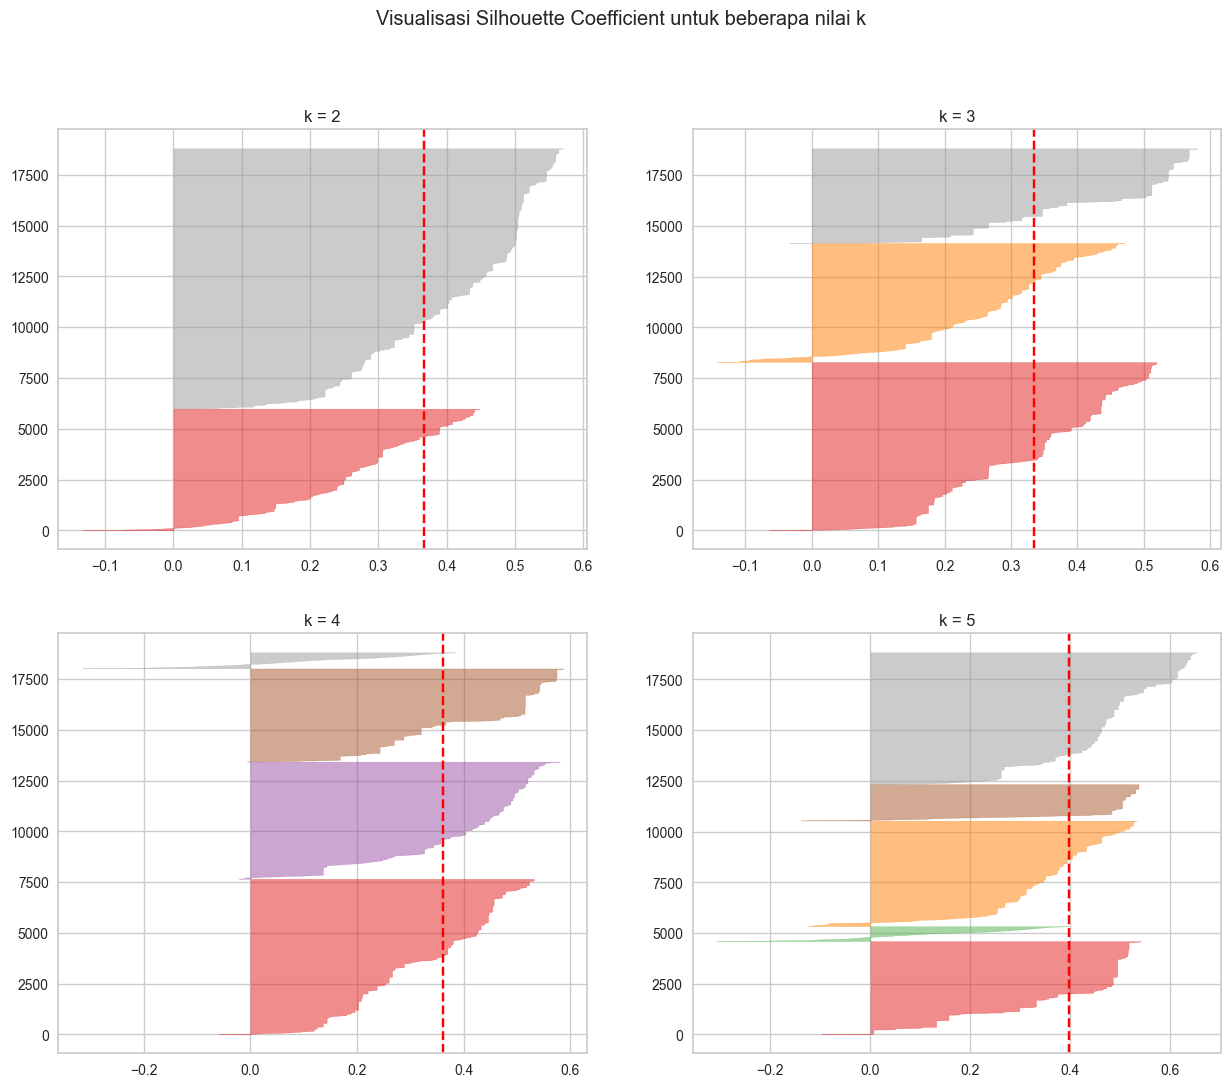

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(f1_ftrs)

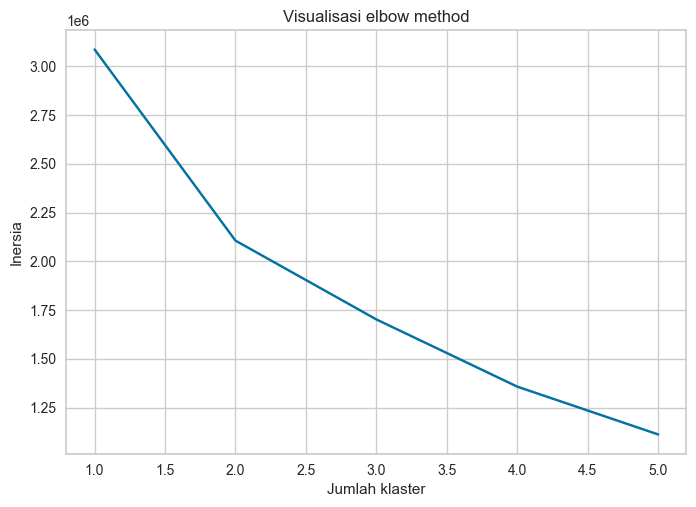

In [ ]:
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(f1_ftrs)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

> Dari hasil silhoutte coefficient, dan elbow method diatas. K yang terbaik untuk digunakan yaitu K = 2 dengan skor silhoutte coefficient 0.36634948812403434

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10)
assignment_cc = kmeans.fit_predict(f1_ftrs)

In [ ]:
df_with_clusters_cc = pd.DataFrame(f1_ftrs.copy())
df_with_clusters_cc['cluster'] = assignment_cc
df_with_clusters_cc.head()

Sector1Time  Sector2Time  Sector3Time  cluster
0    46.000163    28.000979    25.000801        1
1    39.000129    43.000601    25.000337        1
2    28.000890    18.000554    35.000437        0
3    28.000315    28.000929    30.000478        0
4    34.000895    29.000874    29.000973        0

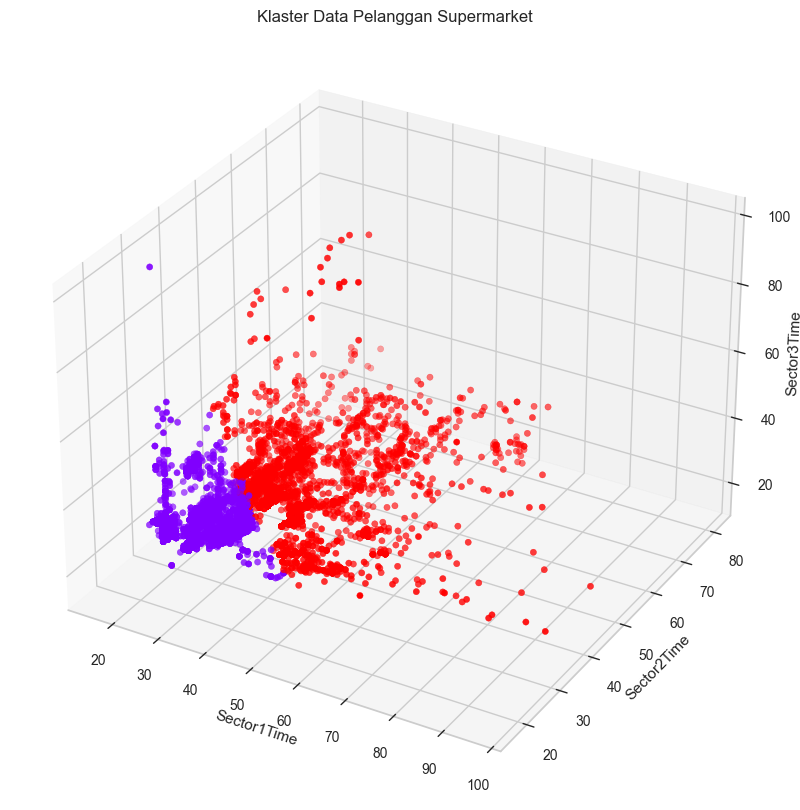

In [ ]:
# visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters_cc[features[0]]
y = df_with_clusters_cc[features[1]]
z = df_with_clusters_cc[features[2]]
cluster = df_with_clusters_cc['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

plt.show()

> **Kluster merah** menujukkan waktu balapan yang singkat, Sector 1,2, dan 3 membutuhkan waktu yang sedikit untuk dilalui. Hal ini menunjukkan untuk melakukan 1 lap memiliki **total LapTime yang rendah**<br><br>
> **Kluster ungu** menunjukkan waktu balapan yang cenderung lebih lama, sector 1 dan 2 memiliki persebaran yang lebih luas sementara sector 3 persebarannya tidak seluas sector 1 dan 2. Hal ini menggambarkan cluster ungu memiliki waktu untuk melakukan 1 lap balapan memiliki **total Laptime yang lebih lama**  

### PCA 

In [ ]:
pca = PCA()
df_f1_pca = f1_data.copy()
df_f1_pca.head()

Time     LapTime  Stint  Sector1Time  Sector2Time  Sector3Time  \
0  8785.000496  100.000943    6.0    46.000163    28.000979    25.000801   
1  4431.000732  108.000067    1.0    39.000129    43.000601    25.000337   
2  8555.000139   82.000881    2.0    28.000890    18.000554    35.000437   
3  3816.000822   91.000585    1.0    28.000315    28.000929    30.000478   
4  6340.000072   94.000742    2.0    34.000895    29.000874    29.000973   

   Sector1SessionTime  Sector2SessionTime  Sector3SessionTime  SpeedI1  ...  \
0         8736.000926         8765.000905         8791.000706    283.0  ...   
1         4362.000794         4406.000395         4431.000732    199.0  ...   
2         8501.000150         8519.000704         8555.000141    275.0  ...   
3         3898.000279         3786.000412         3816.000927    266.0  ...   
4         6280.000174         6310.000048         6340.000021    274.0  ...   

   Humidity  Pressure  TrackTemp  WindDirection  WindSpeed  Pos_cat  \
0      68.0    1008.0       24.8            157        3.0        0   
1      49.0    1008.5       43.3            275        1.0        2   
2      57.0    1018.2       29.9              0        0.6        0   
3      67.0    1007.7       29.5            135        1.8        2   
4      55.0    1011.0       31.0            271        1.3        1   

   IsPersonalBest_True  FreshTyre_True  Deleted_True  Rainfall_True  
0                False           False         False          False  
1                False            True         False          False  
2                 True            True         False          False  
3                False            True         False          False  
4                False            True         False          False  

[5 rows x 27 columns]

In [ ]:
scaler = MinMaxScaler()
f1_pca_std = scaler.fit_transform(df_f1_pca)

In [ ]:
pca.fit(f1_pca_std)

PCA()

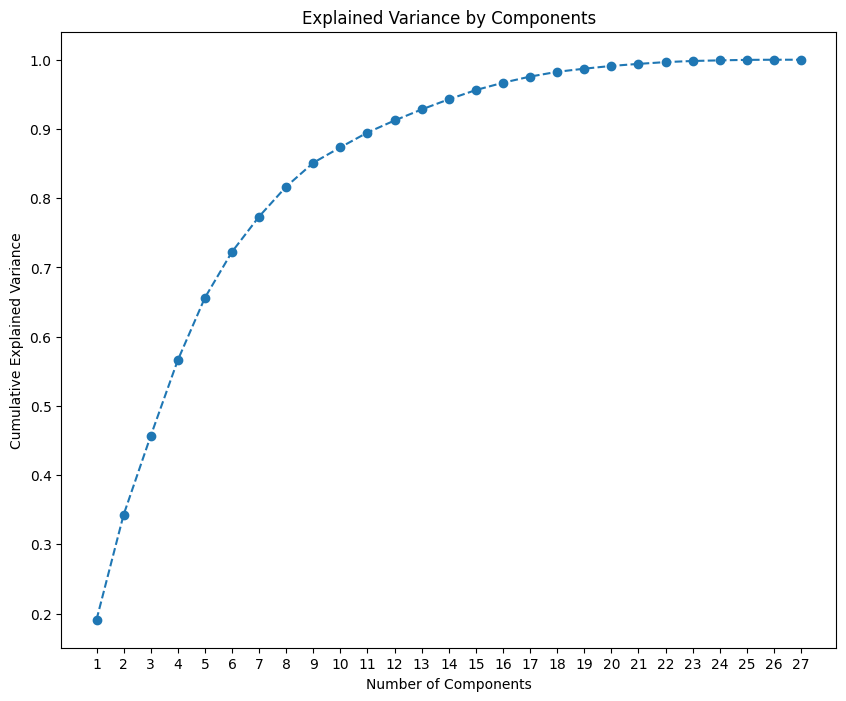

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 28), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, 28)) 
plt.show()

In [ ]:
pca = PCA(n_components = 8)
pca.fit(f1_pca_std)

PCA(n_components=8)

In [ ]:
scores_pca = pca.transform(df_f1_pca)
scores_pca

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[15415.33373542, -5002.08370078,  6085.49676664, ...,
         -577.82171165,   438.08799738, -2594.22033101],
       [ 7689.29156255, -2564.57609717,  3114.1980261 , ...,
         -381.99025486,   -92.84241958, -1540.13564081],
       [15009.015277  , -4873.9810353 ,  5931.84295364, ...,
         -655.03108479,   512.68524716, -2543.07776042],
       ...,
       [12641.77699564, -4125.23856272,  5007.7179862 , ...,
         -524.68182949,   309.22551838, -2187.00664512],
       [ 7083.76607571, -2364.07124624,  2874.58026625, ...,
         -419.46394577,   -25.86369133, -1456.52499845],
       [12981.16906494, -4247.70470411,  5129.85012485, ...,
         -542.82647302,   232.60873907, -2201.45260021]])

In [ ]:
WCSS = []
for i in range(1,28):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

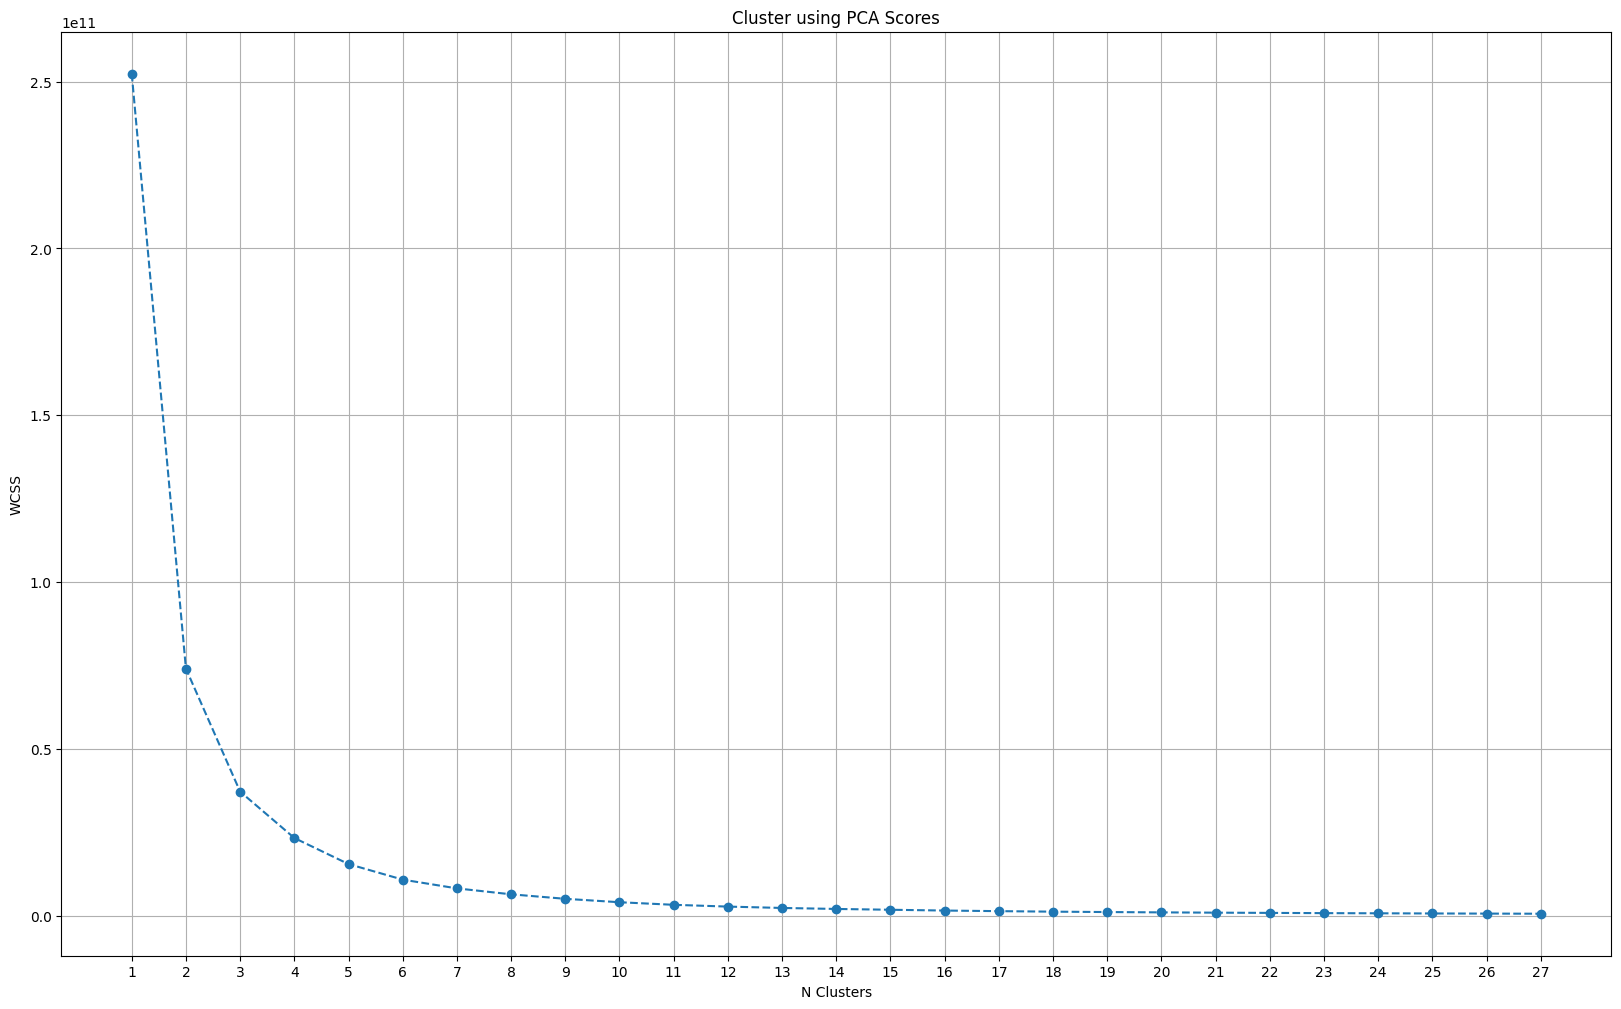

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(range(1,28), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.xticks(range(1, 28))  # Setting x-axis ticks to show every component number
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)

In [ ]:
kmeans_pca.fit(scores_pca)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_f1_pca.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-8:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans


Time     LapTime  Stint  Sector1Time  Sector2Time  Sector3Time  \
0      8785.000496  100.000943    6.0    46.000163    28.000979    25.000801   
1      4431.000732  108.000067    1.0    39.000129    43.000601    25.000337   
2      8555.000139   82.000881    2.0    28.000890    18.000554    35.000437   
3      3816.000822   91.000585    1.0    28.000315    28.000929    30.000478   
4      6340.000072   94.000742    2.0    34.000895    29.000874    29.000973   
...            ...         ...    ...          ...          ...          ...   
18782  5220.000913   85.000235    2.0    30.000620    30.000668    23.000947   
18783  4892.000309  100.000363    1.0    29.000488    42.000838    28.000037   
18784  7231.000678  112.000495    3.0    32.000659    49.000567    30.000269   
18785  4079.000947   85.000938    1.0    30.000564    31.000370    24.000004   
18786  7443.000127  145.000892    3.0    52.000231    53.000937    39.000724   

       Sector1SessionTime  Sector2SessionTime  Sector3SessionTime  SpeedI1  \
0             8736.000926         8765.000905         8791.000706    283.0   
1             4362.000794         4406.000395         4431.000732    199.0   
2             8501.000150         8519.000704         8555.000141    275.0   
3             3898.000279         3786.000412         3816.000927    266.0   
4             6280.000174         6310.000048         6340.000021    274.0   
...                   ...                 ...                 ...      ...   
18782         5166.000294         5196.000962         5220.000909    276.0   
18783         4821.000469         4864.000307         4892.000344    297.0   
18784         7151.000871         7201.000438         7231.000707    309.0   
18785         4024.000556         4055.000926         4079.000930    256.0   
18786         7349.000417         7403.000354         7443.000078    153.0   

       ...  Rainfall_True   Component 1  Component 2  Component 3  \
0      ...          False  15415.333735 -5002.083701  6085.496767   
1      ...          False   7689.291563 -2564.576097  3114.198026   
2      ...          False  15009.015277 -4873.981035  5931.842954   
3      ...          False   6660.765382 -2246.870184  2731.184813   
4      ...          False  11080.466262 -3629.047079  4421.338772   
...    ...            ...           ...          ...          ...   
18782  ...          False   9105.246486 -2997.149914  3646.508117   
18783  ...          False   8508.801512 -2824.370621  3435.062308   
18784  ...          False  12641.776996 -4125.238563  5007.717986   
18785  ...          False   7083.766076 -2364.071246  2874.580266   
18786  ...          False  12981.169065 -4247.704704  5129.850125   

       Component 4  Component 5  Component 6  Component 7  Component 8  \
0      -849.090162 -5660.605909  -577.821712   438.087997 -2594.220331   
1      -448.010584 -2756.092392  -381.990255   -92.842420 -1540.135641   
2      -827.274033 -5513.857365  -655.031085   512.685247 -2543.077760   
3      -397.212692 -2346.070623  -422.434502   -61.569519 -1419.501929   
4      -622.534796 -4029.259550  -412.914182    98.423766 -2036.715741   
...            ...          ...          ...          ...          ...   
18782  -517.268786 -3304.343823  -387.297868    14.160038 -1732.678455   
18783  -491.929008 -3059.216070  -446.175880    39.556873 -1685.179624   
18784  -703.041404 -4625.180131  -524.681829   309.225518 -2187.006645   
18785  -414.994649 -2543.881259  -419.463946   -25.863691 -1456.524998   
18786  -719.901672 -4759.523950  -542.826473   232.608739 -2201.452600   

       Segment K-means PCA  
0                        1  
1                        0  
2                        1  
3                        0  
4                        2  
...                    ...  
18782                    0  
18783                    0  
18784                    2  
18785                    0  
18786                    2  

[18787 rows x 36 columns]

In [ ]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second', 2: 'third'})
df_segm_pca_kmeans

Time     LapTime  Stint  Sector1Time  Sector2Time  Sector3Time  \
0      8785.000496  100.000943    6.0    46.000163    28.000979    25.000801   
1      4431.000732  108.000067    1.0    39.000129    43.000601    25.000337   
2      8555.000139   82.000881    2.0    28.000890    18.000554    35.000437   
3      3816.000822   91.000585    1.0    28.000315    28.000929    30.000478   
4      6340.000072   94.000742    2.0    34.000895    29.000874    29.000973   
...            ...         ...    ...          ...          ...          ...   
18782  5220.000913   85.000235    2.0    30.000620    30.000668    23.000947   
18783  4892.000309  100.000363    1.0    29.000488    42.000838    28.000037   
18784  7231.000678  112.000495    3.0    32.000659    49.000567    30.000269   
18785  4079.000947   85.000938    1.0    30.000564    31.000370    24.000004   
18786  7443.000127  145.000892    3.0    52.000231    53.000937    39.000724   

       Sector1SessionTime  Sector2SessionTime  Sector3SessionTime  SpeedI1  \
0             8736.000926         8765.000905         8791.000706    283.0   
1             4362.000794         4406.000395         4431.000732    199.0   
2             8501.000150         8519.000704         8555.000141    275.0   
3             3898.000279         3786.000412         3816.000927    266.0   
4             6280.000174         6310.000048         6340.000021    274.0   
...                   ...                 ...                 ...      ...   
18782         5166.000294         5196.000962         5220.000909    276.0   
18783         4821.000469         4864.000307         4892.000344    297.0   
18784         7151.000871         7201.000438         7231.000707    309.0   
18785         4024.000556         4055.000926         4079.000930    256.0   
18786         7349.000417         7403.000354         7443.000078    153.0   

       ...   Component 1  Component 2  Component 3  Component 4  Component 5  \
0      ...  15415.333735 -5002.083701  6085.496767  -849.090162 -5660.605909   
1      ...   7689.291563 -2564.576097  3114.198026  -448.010584 -2756.092392   
2      ...  15009.015277 -4873.981035  5931.842954  -827.274033 -5513.857365   
3      ...   6660.765382 -2246.870184  2731.184813  -397.212692 -2346.070623   
4      ...  11080.466262 -3629.047079  4421.338772  -622.534796 -4029.259550   
...    ...           ...          ...          ...          ...          ...   
18782  ...   9105.246486 -2997.149914  3646.508117  -517.268786 -3304.343823   
18783  ...   8508.801512 -2824.370621  3435.062308  -491.929008 -3059.216070   
18784  ...  12641.776996 -4125.238563  5007.717986  -703.041404 -4625.180131   
18785  ...   7083.766076 -2364.071246  2874.580266  -414.994649 -2543.881259   
18786  ...  12981.169065 -4247.704704  5129.850125  -719.901672 -4759.523950   

       Component 6  Component 7  Component 8  Segment K-means PCA  Segment  
0      -577.821712   438.087997 -2594.220331                    1   second  
1      -381.990255   -92.842420 -1540.135641                    0    first  
2      -655.031085   512.685247 -2543.077760                    1   second  
3      -422.434502   -61.569519 -1419.501929                    0    first  
4      -412.914182    98.423766 -2036.715741                    2    third  
...            ...          ...          ...                  ...      ...  
18782  -387.297868    14.160038 -1732.678455                    0    first  
18783  -446.175880    39.556873 -1685.179624                    0    first  
18784  -524.681829   309.225518 -2187.006645                    2    third  
18785  -419.463946   -25.863691 -1456.524998                    0    first  
18786  -542.826473   232.608739 -2201.452600                    2    third  

[18787 rows x 37 columns]

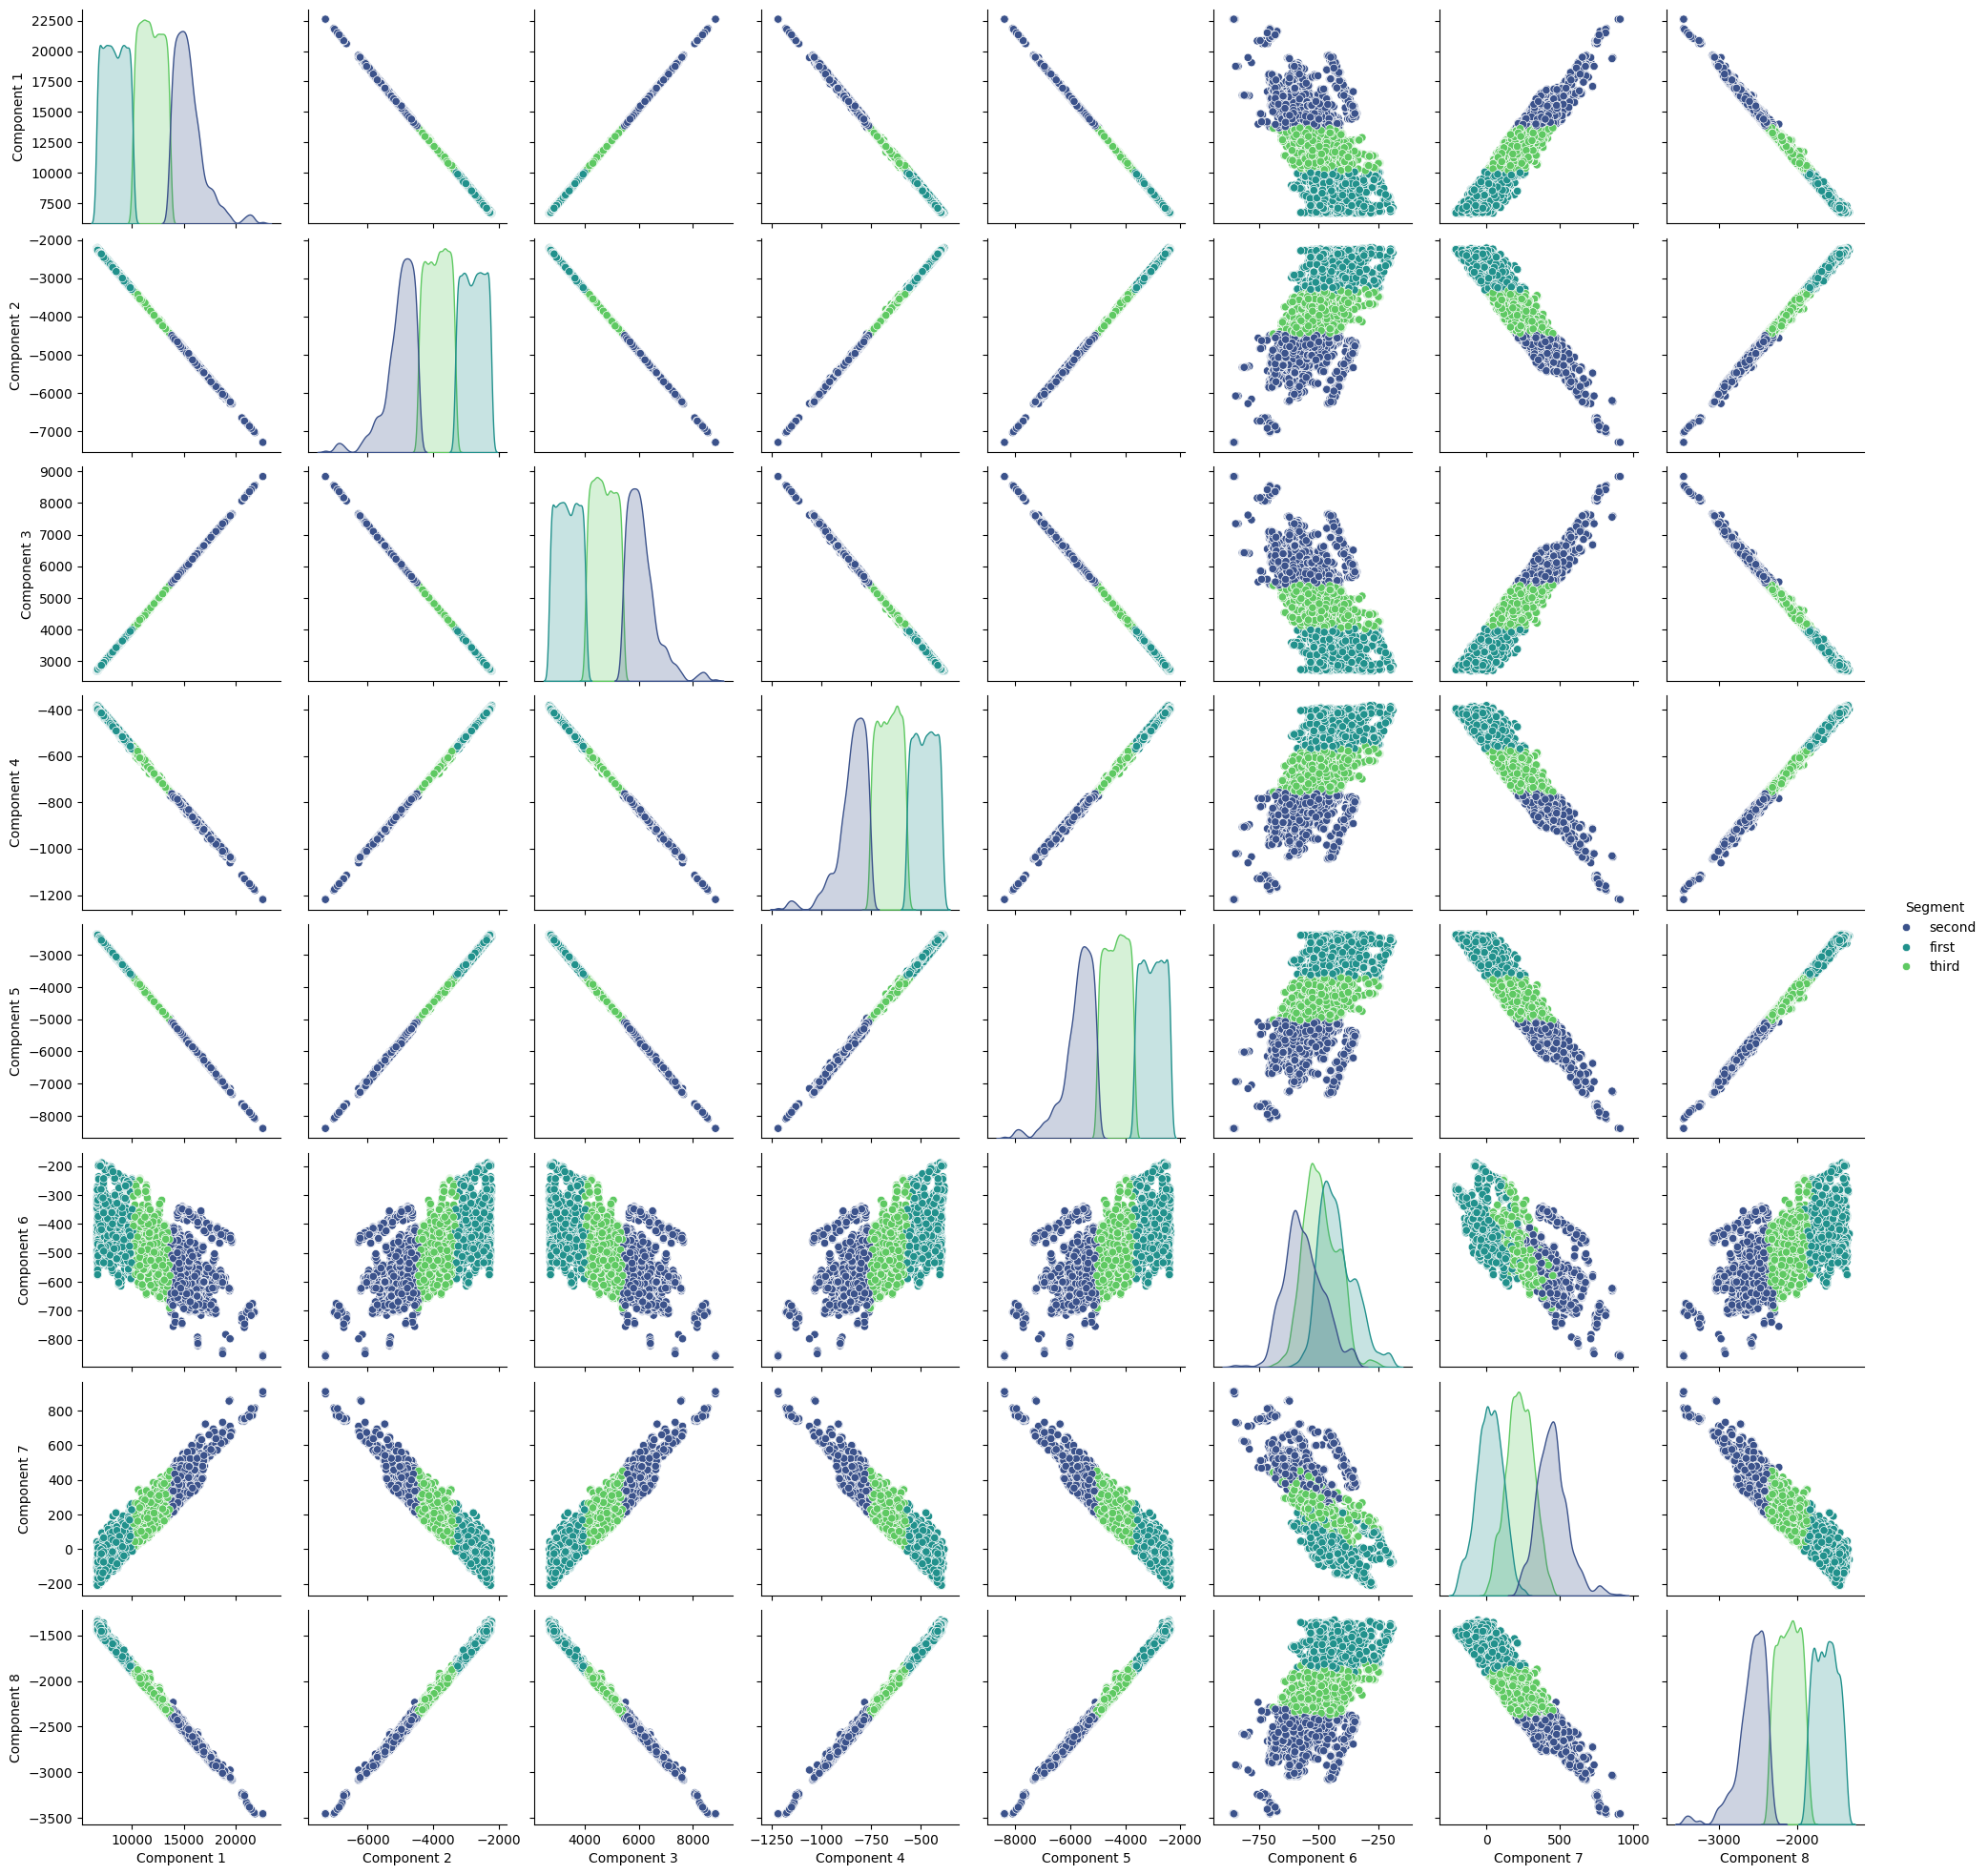

In [ ]:
# Use seaborn's pairplot to visualize relationships between each pair of components
sns.pairplot(df_segm_pca_kmeans, vars=['Component 1', 'Component 2', 'Component 3', 'Component 4', 
                                       'Component 5', 'Component 6', 'Component 7', 'Component 8'], 
             hue='Segment', palette='viridis')
plt.show()

Dengan diambil 8 komponen dalam PCA dan 3 clusters yang terbentuk, bisa didapatkan beberapa hubungan dari antar komponen dalam grafik ini. Terlihat bahwa distribusi yang melibatkan komponen 6 di sini menciptakan penyebaran yang lebih tersebar dibandingkan komponen lainnya. Hal tersebut juga terjadi saat suatu komponen dibandingkan dengan komponen 6 yang menciptakan penyebaran yang lebih "tersebar" dibandingkan dengan komponen lainnya (selain komponen 6)

### Hierarchical Clustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

In [299]:
data_clustering = f1_data.copy()

In [300]:
data_clustering = pd.DataFrame(MinMaxScaler().fit_transform(data_clustering), columns=data_clustering.keys())
data_clustering.head()

Time   LapTime     Stint  Sector1Time  Sector2Time  Sector3Time  \
0  0.548426  0.308418  0.714286     0.374992     0.171880     0.108433   
1  0.070857  0.383176  0.000000     0.287491     0.406248     0.108427   
2  0.523198  0.140194  0.142857     0.150001     0.015624     0.228910   
3  0.003400  0.224303  0.000000     0.149994     0.171879     0.168670   
4  0.280246  0.252342  0.142857     0.225001     0.187503     0.156628   

   Sector1SessionTime  Sector2SessionTime  Sector3SessionTime   SpeedI1  ...  \
0            0.548006            0.550958            0.549144  0.772871  ...   
1            0.060815            0.071208            0.070864  0.507886  ...   
2            0.521831            0.523883            0.523256  0.747634  ...   
3            0.009133            0.002972            0.003401  0.719243  ...   
4            0.274449            0.280762            0.280276  0.744479  ...   

   Humidity  Pressure  TrackTemp  WindDirection  WindSpeed  Pos_cat  \
0  0.793651  0.955454   0.185897       0.437326   0.454545      0.0   
1  0.492063  0.957535   0.778846       0.766017   0.151515      1.0   
2  0.619048  0.997918   0.349359       0.000000   0.090909      0.0   
3  0.777778  0.954205   0.336538       0.376045   0.272727      1.0   
4  0.587302  0.967943   0.384615       0.754875   0.196970      0.5   

   IsPersonalBest_True  FreshTyre_True  Deleted_True  Rainfall_True  
0                  0.0             0.0           0.0            0.0  
1                  0.0             1.0           0.0            0.0  
2                  1.0             1.0           0.0            0.0  
3                  0.0             1.0           0.0            0.0  
4                  0.0             1.0           0.0            0.0  

[5 rows x 27 columns]

>Pada dataset terdapat beberapa fitur yang terkait dengan waktu seperti `Time`, `Sector1SessionTime`, `Sector2SessionTime`, `Sector3SessionTime`, dan `LapStartTime` dan fitur-fitur tersebut redundan terhadap fitur terkait durasi seperti `LapTime`, `Sector1Time`, `Sector2Time`, dan `Sector3Time` karena keduanya memberikan informasi yang sama, yaitu peraihan yang didapatkan oleh pembalap F1. Oleh karena itu, fitur-fitur terkait waktu dapat di drop.

In [301]:
data_clustering = data_clustering.drop(axis=1, columns=['Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'LapStartTime'])

In [302]:
variance_of_data = data_clustering.var().sort_values()
print(f"Varians dari setiap fitur di dataset:\n{variance_of_data}")

Varians dari setiap fitur di dataset:
Sector3Time            0.005897
Sector1Time            0.009602
SpeedST                0.009687
SpeedFL                0.010300
Sector2Time            0.015190
LapTime                0.016181
Deleted_True           0.016281
SpeedI1                0.018767
WindSpeed              0.022358
TyreLife               0.023232
Stint                  0.023467
SpeedI2                0.026196
Rainfall_True          0.028470
TrackTemp              0.044689
Pressure               0.052607
Humidity               0.056221
Compound               0.057434
WindDirection          0.064505
AirTemp                0.075354
Pos_cat                0.133457
IsPersonalBest_True    0.151332
FreshTyre_True         0.180854
dtype: float64


>Clustering akan dapat menghasilkan cluster yang berbeda-beda secara signifikan apabila fitur-fiturnya memiliki varians atau persebaran data yang cukup besar. Oleh karena itu, pada dataset ini, kami melakukan drop untuk fitur yang memiliki varians rendah. Setelah melakukan standarisasi pada dataset, kami telah menghitung varians untuk setiap fitur dan memutuskan untuk melakukan drop kepada fitur dengan varians < 0,02.

In [303]:
low_variance_features = variance_of_data[variance_of_data < 0.02].index.tolist()
data_clustering = data_clustering.drop(low_variance_features, axis=1)

In [304]:
data_clustering.corr()

Stint   SpeedI2  Compound  TyreLife   AirTemp  \
Stint                1.000000  0.053466 -0.193691 -0.007387 -0.251986   
SpeedI2              0.053466  1.000000  0.040422  0.061460  0.025079   
Compound            -0.193691  0.040422  1.000000 -0.168629  0.013628   
TyreLife            -0.007387  0.061460 -0.168629  1.000000 -0.030703   
AirTemp             -0.251986  0.025079  0.013628 -0.030703  1.000000   
Humidity             0.128419  0.018915  0.012544 -0.026894 -0.337623   
Pressure            -0.145666 -0.058540 -0.154286 -0.021380  0.036300   
TrackTemp           -0.159279 -0.040142  0.148930 -0.035380  0.537780   
WindDirection       -0.069546  0.268585 -0.018787 -0.012430 -0.065022   
WindSpeed           -0.082578 -0.209494  0.052185  0.017933 -0.052675   
Pos_cat             -0.087680  0.019590  0.069714  0.074799  0.000660   
IsPersonalBest_True -0.124177  0.050679  0.056143 -0.166588  0.007780   
FreshTyre_True      -0.141652 -0.067905  0.009833 -0.084142 -0.025993   
Rainfall_True        0.100748 -0.212736 -0.156174 -0.090224 -0.196955   

                     Humidity  Pressure  TrackTemp  WindDirection  WindSpeed  \
Stint                0.128419 -0.145666  -0.159279      -0.069546  -0.082578   
SpeedI2              0.018915 -0.058540  -0.040142       0.268585  -0.209494   
Compound             0.012544 -0.154286   0.148930      -0.018787   0.052185   
TyreLife            -0.026894 -0.021380  -0.035380      -0.012430   0.017933   
AirTemp             -0.337623  0.036300   0.537780      -0.065022  -0.052675   
Humidity             1.000000  0.418244  -0.504658      -0.057728   0.195173   
Pressure             0.418244  1.000000  -0.407644      -0.126048   0.105041   
TrackTemp           -0.504658 -0.407644   1.000000      -0.023040  -0.101841   
WindDirection       -0.057728 -0.126048  -0.023040       1.000000  -0.017710   
WindSpeed            0.195173  0.105041  -0.101841      -0.017710   1.000000   
Pos_cat              0.001388 -0.011342   0.015882       0.001265  -0.011009   
IsPersonalBest_True  0.053373  0.065624   0.016363      -0.005287   0.006033   
FreshTyre_True       0.143275  0.160719  -0.174720      -0.002096   0.073774   
Rainfall_True        0.133344  0.055406  -0.223542      -0.044077  -0.003406   

                      Pos_cat  IsPersonalBest_True  FreshTyre_True  \
Stint               -0.087680            -0.124177       -0.141652   
SpeedI2              0.019590             0.050679       -0.067905   
Compound             0.069714             0.056143        0.009833   
TyreLife             0.074799            -0.166588       -0.084142   
AirTemp              0.000660             0.007780       -0.025993   
Humidity             0.001388             0.053373        0.143275   
Pressure            -0.011342             0.065624        0.160719   
TrackTemp            0.015882             0.016363       -0.174720   
WindDirection        0.001265            -0.005287       -0.002096   
WindSpeed           -0.011009             0.006033        0.073774   
Pos_cat              1.000000             0.000039       -0.005931   
IsPersonalBest_True  0.000039             1.000000       -0.005569   
FreshTyre_True      -0.005931            -0.005569        1.000000   
Rainfall_True       -0.005214            -0.015746        0.022701   

                     Rainfall_True  
Stint                     0.100748  
SpeedI2                  -0.212736  
Compound                 -0.156174  
TyreLife                 -0.090224  
AirTemp                  -0.196955  
Humidity                  0.133344  
Pressure                  0.055406  
TrackTemp                -0.223542  
WindDirection            -0.044077  
WindSpeed                -0.003406  
Pos_cat                  -0.005214  
IsPersonalBest_True      -0.015746  
FreshTyre_True            0.022701  
Rainfall_True             1.000000

In [305]:
agglomerative_temp = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarichal_assignment = agglomerative_temp.fit(data_clustering)

hierarichal_assignment.labels_

array([13454, 16713, 10212, ...,     5,     2,     0], dtype=int64)

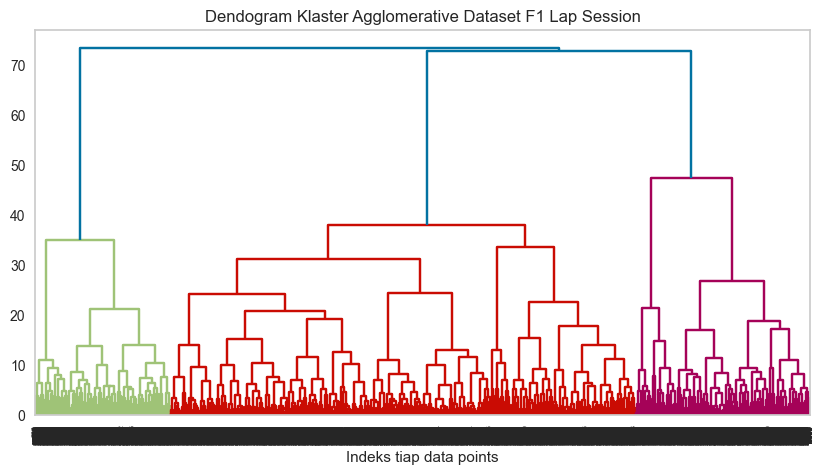

In [306]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative_temp, truncate_mode=None)
plt.title("Dendogram Klaster Agglomerative Dataset F1 Lap Session")
plt.xlabel("Indeks tiap data points")
plt.show()

> Dapat terilhat pada Dendogram diatas, garis biru merupakan garis terpanjang dan memiliki perbedaan yang signifikan dibandingkan garis warna lainnya, hal ini menandakan jumlah k untuk clustering yang optimal adalah sebanyak k=3 sesuai dengan jumlah garis vertikal pada garis biru.

In [307]:
agglomerative_f1 = AgglomerativeClustering(n_clusters=3)
hierarichal_assignment_fix = agglomerative_f1.fit_predict(data_clustering)

In [308]:
result_agg_cluster = pd.DataFrame(data_clustering.copy())
result_agg_cluster['cluster'] = hierarichal_assignment_fix
result_agg_cluster.head()

Stint   SpeedI2  Compound  TyreLife   AirTemp  Humidity  Pressure  \
0  0.714286  0.726027      0.25  0.104478  0.088608  0.793651  0.955454   
1  0.000000  0.530822      1.00  0.074627  0.588608  0.492063  0.957535   
2  0.142857  0.825342      0.50  0.492537  0.120253  0.619048  0.997918   
3  0.000000  0.712329      0.75  0.000000  0.120253  0.777778  0.954205   
4  0.142857  0.856164      0.50  0.119403  0.658228  0.587302  0.967943   

   TrackTemp  WindDirection  WindSpeed  Pos_cat  IsPersonalBest_True  \
0   0.185897       0.437326   0.454545      0.0                  0.0   
1   0.778846       0.766017   0.151515      1.0                  0.0   
2   0.349359       0.000000   0.090909      0.0                  1.0   
3   0.336538       0.376045   0.272727      1.0                  0.0   
4   0.384615       0.754875   0.196970      0.5                  0.0   

   FreshTyre_True  Rainfall_True  cluster  
0             0.0            0.0        0  
1             1.0            0.0        2  
2             1.0            0.0        1  
3             1.0            0.0        2  
4             1.0            0.0        2

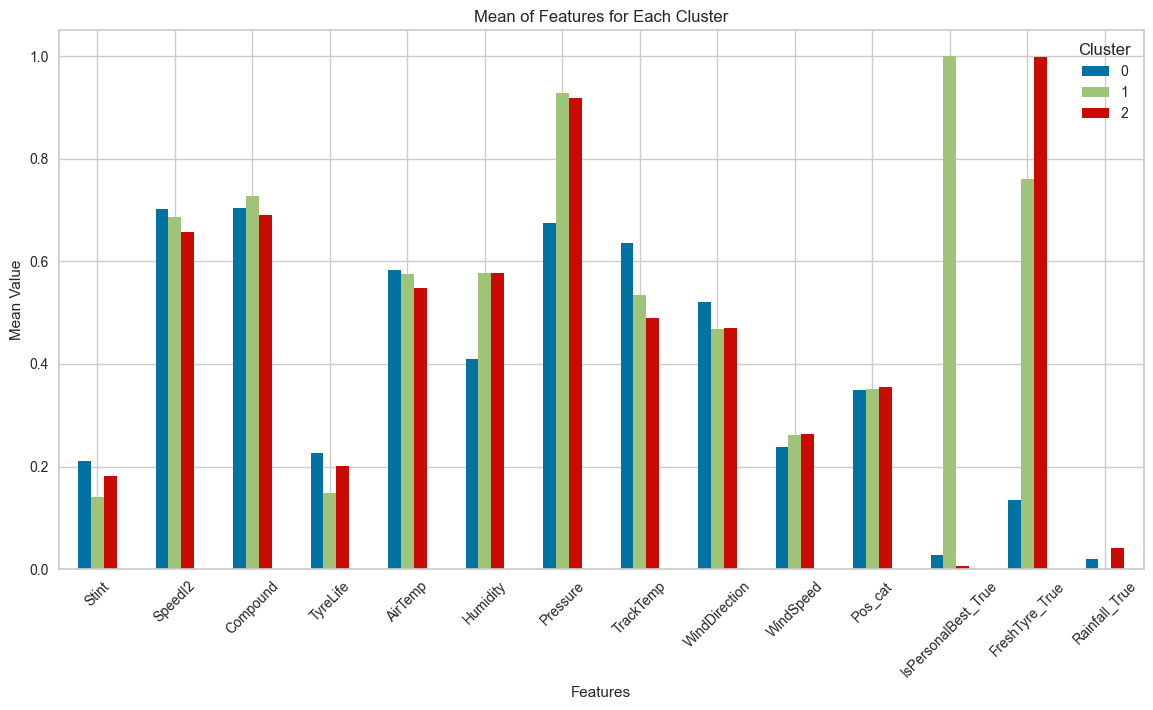

In [313]:
cluster_means = result_agg_cluster.groupby('cluster').mean()

# Plotting
cluster_means.T.plot(kind='bar', figsize=(14, 7))  # Transpose to have features as rows and clusters as columns
plt.title('Mean of Features for Each Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.legend(title='Cluster', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Berdasarkan grafik "Mean of Features for Each Cluster" yang telah dihasilkan, berikut adalah interpretasi dari masing-masing kluster:

1. **Cluster 0 (Warna Biru)**:
   - **Stint**: Kluster ini memiliki nilai rata-rata stint tertinggi dibandingkan kluster lainnya, menunjukkan bahwa mobil dalam kluster ini biasanya berada pada stint akhir atau melakukan stint yang lebih panjang.
   - **SpeedI2**: Nilai rata-rata SpeedI2 (kecepatan di sektor 2) cukup tinggi, menandakan bahwa mobil dalam kluster ini cenderung cepat di sektor ini.
   - **Compound**: Menggunakan berbagai jenis compound (soft, medium, hard, intermediate, wet) secara seimbang.
   - **TyreLife**: Masa pakai ban berada pada tingkat menengah namun lebih baik dibandingkan cluster lainnya, menunjukkan bahwa ban tidak terlalu baru tetapi juga tidak terlalu usang.
   - **AirTemp**: Suhu udara berada di tingkat yang lebih tinggi dibandingkan dengan cluster lainnya.
   - **Pressure**:Tekanan udara sangat rendah dibandingkan kluster lain.
   - **TrackTemp**: Suhu lintasan tertinggi dibandingkan dengan kluster lainnya.
   - **Pos_cat**: Mobil dalam kluster ini seringkali berada dalam posisi "Participant" (partisipan) dalam balapan.
   - **WindSpeed**: Kecepatan angin cukup tinggi, menunjukkan kondisi angin yang lebih menantang.
   
2. **Cluster 1 (Warna Hijau)**:
   - **Stint**: Kluster ini memiliki nilai rata-rata stint terendah, menunjukkan mobil sering berada pada stint yang lebih pendek atau stint awal.
   - **SpeedI2**: Kecepatan di sektor 1 lebih tinggi daripada kluster 2 tetapi lebih rendah daripada kluster 0.
   - **Compound**: Penggunaan compound lebih seimbang, tetapi sedikit lebih banyak menggunakan compound keras (hard).
   - **TyreLife**: Masa pakai ban cenderung lebih baru, menunjukkan seringnya mengganti ban atau menggunakan ban baru.
   - **AirTemp dan Pressure**: Suhu udara dan tekanan udara cenderung lebih tinggi dibandingkan kluster 2.
   - **TrackTemp**: Suhu lintasan lebih tinggi dibandingkan kluster 2.
   - **Pos_cat**: Mobil dalam kluster ini seringkali berada dalam posisi "Point" (poin).
   - **IsPersonalBest_True dan FreshTyre_True**: Kluster ini memiliki banyak lap yang merupakan lap terbaik pribadi dan cukup sering menggunakan ban baru.

3. **Cluster 2 (Warna Merah)**:
   - **Stint**: Nilai rata-rata stint berada di tengah antara kluster 0 dan 1.
   - **SpeedI2**: Kecepatan di sektor 2 cenderung lebih rendah dibandingkan kluster lainnya.
   - **Compound**: Penggunaan compound seimbang tetapi sedikit lebih sering menggunakan compound intermediate dan wet.
   - **TyreLife**: Masa pakai ban berada di tingkat menengah.
   - **AirTemp**: Suhu udara lebih rendah dibandingkan dengan kluster lainnya.
   - **Pressure**: Tekanan udara lebih rendah.
   - **TrackTemp**: Suhu lintasan berada di tingkat terendah dibandingkat cluster lainnya.
   - **Pos_cat**: Mobil dalam kluster ini seringkali berada dalam posisi "Podium" (pemenang podium).
   - **WindSpeed**: Kecepatan angin lebih rendah dibandingkan kluster lainnya.
   - **FreshTyre_True**: Kluster ini hampir tidak pernah menggunakan ban lama.

>Dengan begitu maka dapat disimpulkan bahwa:

- **Kluster 0**: Mobil dengan stint panjang, performa baik di sektor 2, menggunakan ban lebih lama, beroperasi dalam kondisi angin yang lebih kuat, dan sering hanya sebagai partisipan.
- **Kluster 1**: Mobil dengan stint rendah, performa lebih moderat di sektor 2, sering menggunakan ban baru, beroperasi dalam kondisi cuaca yang lebih panas dan lembab, dan cenderung mendapatkan poin.
- **Kluster 2**: Mobil dengan stint menengah, performa rendah di sektor 2, kondisi cuaca lebih dingin dan kering, dan cenderung mendapatkan podium.

## **Kode Submission Kaggle**

In [ ]:
train = pd.read_csv("f1_train.csv")
train = train.drop(axis=1, columns=["ID"])

f1_classif = pd.read_csv("f1_test_classif.csv")
id_classif = f1_classif['ID']
f1_classif = f1_classif.drop(axis=1, columns=["ID"])

f1_reg = pd.read_csv("f1_test_reg.csv")
id_reg = f1_reg['ID']
f1_reg = f1_reg.drop(axis=1, columns=["ID"])

In [ ]:
f1_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                2349 non-null   object 
 1   LapTime             2308 non-null   object 
 2   Stint               2349 non-null   float64
 3   PitOutTime          119 non-null    object 
 4   PitInTime           90 non-null     object 
 5   Sector1Time         2297 non-null   object 
 6   Sector2Time         2344 non-null   object 
 7   Sector3Time         2336 non-null   object 
 8   Sector1SessionTime  2291 non-null   object 
 9   Sector2SessionTime  2344 non-null   object 
 10  Sector3SessionTime  2336 non-null   object 
 11  SpeedI1             1990 non-null   float64
 12  SpeedI2             2344 non-null   float64
 13  SpeedFL             2254 non-null   float64
 14  SpeedST             2110 non-null   float64
 15  IsPersonalBest      2344 non-null   object 
 16  Compou

In [ ]:
f1_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                2348 non-null   object 
 1   LapTime             2316 non-null   object 
 2   Stint               2348 non-null   float64
 3   PitOutTime          133 non-null    object 
 4   PitInTime           87 non-null     object 
 5   Sector1Time         2286 non-null   object 
 6   Sector2Time         2345 non-null   object 
 7   Sector3Time         2340 non-null   object 
 8   Sector1SessionTime  2283 non-null   object 
 9   Sector2SessionTime  2345 non-null   object 
 10  Sector3SessionTime  2340 non-null   object 
 11  SpeedI1             1984 non-null   float64
 12  SpeedI2             2345 non-null   float64
 13  SpeedFL             2257 non-null   float64
 14  SpeedST             2123 non-null   float64
 15  IsPersonalBest      2345 non-null   object 
 16  Compou

In [ ]:
f1_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                2349 non-null   object 
 1   LapTime             2308 non-null   object 
 2   Stint               2349 non-null   float64
 3   PitOutTime          119 non-null    object 
 4   PitInTime           90 non-null     object 
 5   Sector1Time         2297 non-null   object 
 6   Sector2Time         2344 non-null   object 
 7   Sector3Time         2336 non-null   object 
 8   Sector1SessionTime  2291 non-null   object 
 9   Sector2SessionTime  2344 non-null   object 
 10  Sector3SessionTime  2336 non-null   object 
 11  SpeedI1             1990 non-null   float64
 12  SpeedI2             2344 non-null   float64
 13  SpeedFL             2254 non-null   float64
 14  SpeedST             2110 non-null   float64
 15  IsPersonalBest      2344 non-null   object 
 16  Compou

### Preprocessing

In [ ]:
def cek_duplicates(df):
    if df.duplicated().sum() > 0:
        print("Terdapat", df.duplicated().sum(), "pasang data yang redundan")
        display(df[df.duplicated()])
    else:
        print("Tidak ada data yang redundan")

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

def cek_outlier(df):
    df_numerical = df.select_dtypes(include=['float64', 'int64']) 
    Q1 = df_numerical.quantile(0.25, numeric_only=True)
    Q3 = df_numerical.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df_numerical < lower_limit) | (df_numerical > upper_limit)

    # Menghitung dan menampilkan persentase outlier pada tiap atribut.
    percentage_outliers = (outliers.sum() / len(df)) * 100
    print("Persentase Outlier pada tiap atribut:")
    print(percentage_outliers)

In [ ]:
cek_null(f1_classif)

                    Total    Percent
IsPersonalBest          5   0.212857
Sector2SessionTime      5   0.212857
Sector2Time             5   0.212857
SpeedI2                 5   0.212857
Sector3SessionTime     13   0.553427
Sector3Time            13   0.553427
LapTime                41   1.745424
Sector1Time            52   2.213708
Sector1SessionTime     58   2.469136
SpeedFL                95   4.044274
SpeedST               239  10.174542
SpeedI1               359  15.283099
PitOutTime           2230  94.934014
PitInTime            2259  96.168582
DeletedReason        2312  98.424862


In [ ]:
cek_null(f1_reg)

                    Total    Percent
IsPersonalBest          3   0.127768
Sector2SessionTime      3   0.127768
Sector2Time             3   0.127768
SpeedI2                 3   0.127768
Sector3SessionTime      8   0.340716
Sector3Time             8   0.340716
LapTime                32   1.362862
Sector1Time            62   2.640545
Sector1SessionTime     65   2.768313
SpeedFL                91   3.875639
SpeedST               225   9.582624
SpeedI1               364  15.502555
PitOutTime           2215  94.335605
PitInTime            2261  96.294719
DeletedReason        2314  98.551959


In [ ]:
cek_null(train)

                    Total    Percent
IsPersonalBest         30   0.159676
SpeedI2                39   0.207579
Sector2SessionTime     39   0.207579
Sector2Time            39   0.207579
Sector3SessionTime     92   0.489674
Sector3Time            92   0.489674
LapTime               290   1.543538
Sector1Time           407   2.166276
Sector1SessionTime    444   2.363211
SpeedFL               775   4.124973
SpeedST              1692   9.005748
SpeedI1              2917  15.525868
PitOutTime          17749  94.469874
PitInTime           18053  96.087928
DeletedReason       18477  98.344688


In [ ]:
f1_classif = f1_classif.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])
f1_reg = f1_reg.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])
train = train.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

In [ ]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    numerics = ['SpeedI2', 'SpeedFL', 'SpeedST', 'SpeedI1']
    for col in numerics:
        df_feature = f1_classif[col]
        plt.figure(figsize=(10,5))
        plt.title(f'Distribusi data {col}')
        sns.kdeplot(df_feature, fill=True)
        plt.show()
    print("Menampilkan Modus dari data kategorikal")
    categoricals = ["IsPersonalBest", "Sector2SessionTime", "Sector2Time","Sector3SessionTime", "Sector3Time", "LapTime", "Sector1Time", "Sector1SessionTime"]
    for col in categoricals:
        print(f"Mode for {col} = {f1_classif[col].mode()[0]}")

In [ ]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [ ]:
f1_reg['SpeedI2'] = fill_null_median(f1_reg['SpeedI2'])
f1_reg['SpeedFL'] = fill_null_median(f1_reg['SpeedFL'])
f1_reg['SpeedST'] = fill_null_mean(f1_reg['SpeedST'])
f1_reg['SpeedI1'] = fill_null_median(f1_reg['SpeedI1'])
f1_reg['IsPersonalBest'] = fill_null_mode(f1_reg['IsPersonalBest'])
f1_reg['Sector2SessionTime'] = fill_null_mode(f1_reg['Sector2SessionTime'])
f1_reg['Sector2Time'] = fill_null_mode(f1_reg['Sector2Time'])
f1_reg['Sector3SessionTime'] = fill_null_mode(f1_reg['Sector3SessionTime'])
f1_reg['Sector3Time'] = fill_null_mode(f1_reg['Sector3Time'])
f1_reg['LapTime'] = fill_null_mode(f1_reg['LapTime'])
f1_reg['Sector1Time'] = fill_null_mode(f1_reg['Sector1Time'])
f1_reg['Sector1SessionTime'] = fill_null_mode(f1_reg['Sector1SessionTime'])

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_45020\129334964.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_df = df.fillna(mode)


In [ ]:
f1_classif['SpeedI2'] = fill_null_median(f1_classif['SpeedI2'])
f1_classif['SpeedFL'] = fill_null_median(f1_classif['SpeedFL'])
f1_classif['SpeedST'] = fill_null_mean(f1_classif['SpeedST'])
f1_classif['SpeedI1'] = fill_null_median(f1_classif['SpeedI1'])
f1_classif['IsPersonalBest'] = fill_null_mode(f1_classif['IsPersonalBest'])
f1_classif['Sector2SessionTime'] = fill_null_mode(f1_classif['Sector2SessionTime'])
f1_classif['Sector2Time'] = fill_null_mode(f1_classif['Sector2Time'])
f1_classif['Sector3SessionTime'] = fill_null_mode(f1_classif['Sector3SessionTime'])
f1_classif['Sector3Time'] = fill_null_mode(f1_classif['Sector3Time'])
f1_classif['LapTime'] = fill_null_mode(f1_classif['LapTime'])
f1_classif['Sector1Time'] = fill_null_mode(f1_classif['Sector1Time'])
f1_classif['Sector1SessionTime'] = fill_null_mode(f1_classif['Sector1SessionTime'])

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_45020\129334964.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_df = df.fillna(mode)


In [ ]:
train['SpeedI2'] = fill_null_median(train['SpeedI2'])
train['SpeedFL'] = fill_null_median(train['SpeedFL'])
train['SpeedST'] = fill_null_mean(train['SpeedST'])
train['SpeedI1'] = fill_null_median(train['SpeedI1'])
train['IsPersonalBest'] = fill_null_mode(train['IsPersonalBest'])
train['Sector2SessionTime'] = fill_null_mode(train['Sector2SessionTime'])
train['Sector2Time'] = fill_null_mode(train['Sector2Time'])
train['Sector3SessionTime'] = fill_null_mode(train['Sector3SessionTime'])
train['Sector3Time'] = fill_null_mode(train['Sector3Time'])
train['LapTime'] = fill_null_mode(train['LapTime'])
train['Sector1Time'] = fill_null_mode(train['Sector1Time'])
train['Sector1SessionTime'] = fill_null_mode(train['Sector1SessionTime'])

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_45020\129334964.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_df = df.fillna(mode)


In [ ]:
f1_classif.drop_duplicates()
f1_reg.drop_duplicates()
train.drop_duplicates()

Time                 LapTime  Stint  \
0      0 days 02:26:25.496000  0 days 00:01:40.943000    6.0   
1      0 days 01:13:51.732000  0 days 00:01:48.067000    1.0   
2      0 days 02:22:35.139000  0 days 00:01:22.881000    2.0   
3      0 days 01:03:36.822000  0 days 00:01:31.585000    1.0   
4      0 days 01:45:40.072000  0 days 00:01:34.742000    2.0   
...                       ...                     ...    ...   
18783  0 days 01:27:00.913000  0 days 00:01:25.235000    2.0   
18784  0 days 01:21:32.309000  0 days 00:01:40.363000    1.0   
18785  0 days 02:00:31.678000  0 days 00:01:52.495000    3.0   
18786  0 days 01:07:59.947000  0 days 00:01:25.938000    1.0   
18787  0 days 02:04:03.127000  0 days 00:02:25.892000    3.0   

                  Sector1Time             Sector2Time             Sector3Time  \
0      0 days 00:00:46.163000  0 days 00:00:28.979000  0 days 00:00:25.801000   
1      0 days 00:00:39.129000  0 days 00:00:43.601000  0 days 00:00:25.337000   
2      0 days 00:00:28.890000  0 days 00:00:18.554000  0 days 00:00:35.437000   
3      0 days 00:00:28.315000  0 days 00:00:28.929000  0 days 00:00:30.478000   
4      0 days 00:00:34.895000  0 days 00:00:29.874000  0 days 00:00:29.973000   
...                       ...                     ...                     ...   
18783  0 days 00:00:30.620000  0 days 00:00:30.668000  0 days 00:00:23.947000   
18784  0 days 00:00:29.488000  0 days 00:00:42.838000  0 days 00:00:28.037000   
18785  0 days 00:00:32.659000  0 days 00:00:49.567000  0 days 00:00:30.269000   
18786  0 days 00:00:30.564000  0 days 00:00:31.370000  0 days 00:00:24.004000   
18787  0 days 00:00:52.231000  0 days 00:00:53.937000  0 days 00:00:39.724000   

           Sector1SessionTime      Sector2SessionTime      Sector3SessionTime  \
0      0 days 02:25:36.926000  0 days 02:26:05.905000  0 days 02:26:31.706000   
1      0 days 01:12:42.794000  0 days 01:13:26.395000  0 days 01:13:51.732000   
2      0 days 02:21:41.150000  0 days 02:21:59.704000  0 days 02:22:35.141000   
3      0 days 01:04:58.279000  0 days 01:03:06.412000  0 days 01:03:36.927000   
4      0 days 01:44:40.174000  0 days 01:45:10.048000  0 days 01:45:40.021000   
...                       ...                     ...                     ...   
18783  0 days 01:26:06.294000  0 days 01:26:36.962000  0 days 01:27:00.909000   
18784  0 days 01:20:21.469000  0 days 01:21:04.307000  0 days 01:21:32.344000   
18785  0 days 01:59:11.871000  0 days 02:00:01.438000  0 days 02:00:31.707000   
18786  0 days 01:07:04.556000  0 days 01:07:35.926000  0 days 01:07:59.930000   
18787  0 days 02:02:29.417000  0 days 02:03:23.354000  0 days 02:04:03.078000   

       SpeedI1  ...            LapStartTime  Deleted  AirTemp  Humidity  \
0        283.0  ...  0 days 02:24:44.553000    False     17.1      68.0   
1        199.0  ...  0 days 01:12:03.665000    False     25.0      49.0   
2        275.0  ...  0 days 02:21:12.258000    False     17.6      57.0   
3        266.0  ...  0 days 01:02:04.960000    False     17.6      67.0   
4        274.0  ...  0 days 01:44:05.330000    False     26.1      55.0   
...        ...  ...                     ...      ...      ...       ...   
18783    276.0  ...  0 days 01:25:35.678000    False     29.3      32.0   
18784    297.0  ...  0 days 01:19:51.946000    False     30.0      72.0   
18785    309.0  ...  0 days 01:58:39.183000    False     17.6      66.0   
18786    256.0  ...  0 days 01:06:34.009000    False     28.8      33.0   
18787    153.0  ...  0 days 02:01:37.235000    False     20.9      63.0   

      Pressure  Rainfall  TrackTemp WindDirection  WindSpeed      Pos_cat  
0       1008.0     False       24.8           157        3.0  Participant  
1       1008.5     False       43.3           275        1.0       Podium  
2       1018.2     False       29.9             0        0.6  Participant  
3       1007.7     False       29.5           135        1.8       Podium  
4       1011.0     False     

In [ ]:
print(cek_outlier(f1_classif))

Persentase Outlier pada tiap atribut:
Stint             0.255428
SpeedI1           2.852278
SpeedI2           0.510856
SpeedFL           1.277139
SpeedST           8.173691
TyreLife          1.575138
AirTemp           0.000000
Humidity          0.000000
Pressure         16.560238
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         7.747978
dtype: float64
None


In [ ]:
print(cek_outlier(f1_reg))

Persentase Outlier pada tiap atribut:
Stint             0.340716
SpeedI1           3.066440
SpeedI2           0.255537
SpeedFL           0.979557
SpeedST           7.708688
AirTemp           0.000000
Humidity          0.000000
Pressure         16.269165
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         6.090290
dtype: float64
None


In [ ]:
print(cek_outlier(train))

Persentase Outlier pada tiap atribut:
Stint             0.298063
SpeedI1           2.746434
SpeedI2           0.548222
SpeedFL           1.319991
SpeedST           7.259953
TyreLife          1.948052
AirTemp           0.000000
Humidity          0.000000
Pressure         15.829253
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         8.026400
dtype: float64
None


> Atribut `Presure` digunakan untuk memprediksi `TyreLife`, sehingga tidak kami drop .

In [ ]:
for col in f1_classif.select_dtypes(include=object).columns:
    print(col, f": {len(f1_classif[col].unique())}", f1_classif[col].unique())
    print("\n")

Time : 2349 ['0 days 01:19:09.993000' '0 days 01:46:56.673000'
 '0 days 01:58:13.959000' ... '0 days 01:16:20.505000'
 '0 days 02:38:25.861000' '0 days 01:46:48.433000']


LapTime : 2243 ['0 days 00:01:25.001000' '0 days 00:01:32.378000'
 '0 days 00:01:37.974000' ... '0 days 00:01:40.339000'
 '0 days 00:01:40.794000' '0 days 00:01:33.528000']


Sector1Time : 2135 ['0 days 00:00:30.631000' '0 days 00:00:31.596000'
 '0 days 00:00:30.942000' ... '0 days 00:00:29.114000'
 '0 days 00:00:26.874000' '0 days 00:00:31.922000']


Sector2Time : 2189 ['0 days 00:00:30.430000' '0 days 00:00:34.849000'
 '0 days 00:00:42.828000' ... '0 days 00:00:42.991000'
 '0 days 00:00:40.382000' '0 days 00:00:35.533000']


Sector3Time : 2135 ['0 days 00:00:23.940000' '0 days 00:00:25.933000'
 '0 days 00:00:24.204000' ... '0 days 00:00:28.234000'
 '0 days 00:00:33.538000' '0 days 00:00:26.073000']


Sector1SessionTime : 2290 ['0 days 01:18:15.630000' '0 days 01:45:55.886000'
 '0 days 01:57:06.877000' ... '0 days 0

In [ ]:
f1_classif['Compound'] = f1_classif['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})

f1_reg['Compound'] = f1_reg['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})
f1_reg['Pos_cat'] = f1_reg['Pos_cat'].map({'Participant':0, 'Podium':2, 'Point':1})

train['Compound'] = train['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})
train['Pos_cat'] = train['Pos_cat'].map({'Participant':0, 'Podium':2, 'Point':1})

In [ ]:
time_att = []
for col in f1_classif.select_dtypes(include=object).columns:
    time_att.append(col)

In [ ]:
time_att

['Time',
 'LapTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'LapStartTime']

In [ ]:
for time in time_att:
    f1_classif[time] = f1_classif[time].apply(zero_days_remover)
    f1_reg[time] = f1_reg[time].apply(zero_days_remover)
    train[time] = train[time].apply(zero_days_remover)

In [ ]:
for time in time_att:
    f1_classif[time] = f1_classif[time].apply(time_converter)
    f1_reg[time] = f1_reg[time].apply(time_converter)
    train[time] = train[time].apply(time_converter)

In [ ]:
boolean_columns = ['IsPersonalBest', 'FreshTyre', 'Deleted', 'Rainfall']
f1_classif = pd.get_dummies(f1_classif, columns = boolean_columns, drop_first=True) 
f1_reg = pd.get_dummies(f1_reg, columns = boolean_columns, drop_first=True) 
train = pd.get_dummies(train, columns = boolean_columns, drop_first=True) 

### **Kaggle Klasifikasi**

In [ ]:
# Split Dataset Klasifikasi
X_class_train = train.drop(columns=['Pos_cat'], axis=1)
y_class_train = train['Pos_cat']

X_class_test = f1_classif

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
scaler.fit(X_class_train)

X_class_train = scaler.transform(X_class_train)
X_class_test = scaler.transform(X_class_test)

poly = PolynomialFeatures(degree=2)

X_class_train = poly.fit_transform(X_class_train)
X_class_test = poly.transform(X_class_test)

In [ ]:
# Random Forest
rf_f1 = RandomForestClassifier()
rf_f1.fit(X_class_train, y_class_train)

RandomForestClassifier()

In [ ]:
# Memprediksi data testing
predicted = rf_f1.predict(X_class_test)

In [ ]:
classif_df = pd.DataFrame({
    'ID' : id_classif,
    'Pos_cat' : predicted
})

classif_df['Pos_cat'] = classif_df['Pos_cat'].map({0: 'Participant', 2: 'Podium', 1: 'Point'})

classif_df.to_csv('f1_classif_result.csv', index=False)

### **Kaggle Regresi**

In [ ]:
# Split dan seleksi fitur Dataset Klasifikasi
X_regress_train = train.drop(columns=['TyreLife'], axis=1)
y_regress_train = train['TyreLife']
X_regress_test = f1_reg

#Standarisasi

scaler = StandardScaler()
scaler.fit(X_regress_train)

X_regress_train = scaler.transform(X_regress_train)
X_regress_test = scaler.transform(X_regress_test)

poly = PolynomialFeatures(degree=2)

X_regress_train = poly.fit_transform(X_regress_train)
X_regress_test = poly.transform(X_regress_test)

In [ ]:
rf_f1 = RandomForestRegressor()
rf_f1.fit(X_regress_train, y_regress_train)

RandomForestRegressor()

In [ ]:
predicted = rf_f1.predict(X_regress_test)

In [ ]:
regress_df = pd.DataFrame({
    'ID' : id_reg,
    'TyreLife' : predicted
})

regress_df.to_csv('f1_reg_result.csv', index=False)